In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd

os.chdir('F:/LANL/')

root = os.getcwd()
processedfolder = '/processed_data/'

search_arr = sorted(os.listdir(root + processedfolder))
print(search_arr)

nobeamfol = 'runs'+'16453-16763/'
print('runs: ' ,processedfolder+nobeamfol)

folderslist = [nobeamfol]

print(folderslist)
nobeamfiles_D = sorted(os.listdir(root+processedfolder+folderslist[0]+'pulseadd_D')) ## has to be changed to an array
nobeamfiles_U = sorted(os.listdir(root+processedfolder+folderslist[0]+'pulseadd_U')) ## has to be changed to an array

nobeam_numruns = len(nobeamfiles_D)
print(nobeam_numruns)


['La_sample', '_temp_xs.npy', 'runs07862-08069', 'runs09919-10159', 'runs11139-11412', 'runs11413-11726', 'runs11727-12033', 'runs12034-12363', 'runs12364-12684', 'runs13564-13604', 'runs13605-13735', 'runs13736-13851', 'runs16453-16763', 'runs88888-99999', 'testother', 'testother2', 'xs_cut.npy', 'xs_uncut.npy']
runs:  /processed_data/runs16453-16763/
['runs16453-16763/']
259


In [6]:
chan_enab_dn = np.array([0,1,2,3,4,5,6,7,8,9,10,11,24]) ## downstream
chan_enab_up = np.array([12,13,14,15,16,17,18,19,20,21,22,23,24]) ## upstream
chan_enab = np.concatenate((chan_enab_up[:-1],chan_enab_dn[:])) ##organize in upstream then downstream, neutron direction
print(chan_enab)

[12 13 14 15 16 17 18 19 20 21 22 23  0  1  2  3  4  5  6  7  8  9 10 11
 24]


In [7]:
# with h5py.File(root+processedfolder+folderslist[0]+nobeamfiles_D[0], 'r') as f: ## new arr_sizer
# #         print(list(f.keys()))
# #     numchannels = len(channels)-1
#     dataset = f['df_1/block2_values']   ## this is the xs dataset
#     testdataset = np.array(dataset)
#     testdataset = testdataset.flatten()
# #     numpoints = len(dataset)
# #     xs = np.array(dataset)*1e-6 ## now in ms
#     f.close()
# normdatas.append(testdataset)

In [12]:
print(root+processedfolder+nobeamfol+'pulseadd_D')

F:\LANL/processed_data/runs16453-16763/pulseadd_D


In [40]:
with h5py.File('F:/LANL/processed_data/runs16453-16763/pulseadd_D/16453_pulseadd_D' + '.h5', 'r') as f: ## new arr_sizer
    dataset = f['ch_00/added_pulses/ch_00']
    data = np.array(dataset)
    xs = np.array(f['xs '])
    f.close()

In [16]:
folderpath = root+processedfolder+folderslist[0]  ## generalize this to all folders

def loadruns_pol(runslist, processedpath, temp): ## temp is 0 for unpolarized, 1 for polarized. lol
    for i in range(0,len(runslist)):
        runname = processedpath+runslist[i]
#         summedruns_dat = []
#         summedrunsdat = np.zeros((numchannels,numpoints),dtype = np.float64)
#         print(runname)
        with h5py.File(runname, 'r') as f:
            channels = list(f.keys())
            numchannels = len(channels)-1
            arrsizer = f[channels[-1]] ## gets the xs array
            arrsizer = np.asarray(arrsizer)
            numpoints = len(arrsizer)
#             num_seq = f.attrs.get('sequences')
#             numsequences.append(num_seq)
            rundat = np.zeros((numchannels,numpoints),dtype = np.float64)
    #             print(str(np.char.zfill(str(chan_enab[i]),2)))
    #             dataset = f['ch '+str(np.char.zfill(str(chan_enab[i]), 2))]
            for i in range(0,numchannels):
                if temp == 0:
                    dataset = f[channels[i]+'/added_pulses/'+channels[i]][:]  ##change this to match channels[i]
                    chdata = np.array(dataset)
#                     print(chdata)
#                     print(np.size(chdata))
#                     print(len(chdata[0]))
#                     print(rundat)
                    rundat[i] = rundat[i]+chdata
                if temp == 1:
                    dataset = f[channels[i]+'/added_pulses/'+channels[i][:2]+' '+channels[i][3:5]]  ##change this to match channels[i]
                    ON_data = np.array(dataset[0])
                    OFF_data = np.array(dataset[1])
                    rundat[i] = rundat[i]+ON_data+OFF_data
#                 print(len(rundat[i]))
#             summedruns_dat.append(rundat)
            f.close()
    return rundat

pulseaddpath_D = root+processedfolder+nobeamfol+'pulseadd_D/'
pulseaddpath_U = root+processedfolder+nobeamfol+'pulseadd_U/'

print(pulseaddpath_D)

all_pulseadd_D = loadruns_pol(nobeamfiles_D, pulseaddpath_D, 0)
print('pulseadd D done')
all_pulseadd_U = loadruns_pol(nobeamfiles_U, pulseaddpath_U, 0)
print('pulseadd U done')

# testsum = loadruns_pol(unpol_D, unpolpath+'_D/')

F:\LANL/processed_data/runs16453-16763/pulseadd_D/
pulseadd D done
pulseadd U done


In [19]:
print(len(all_pulseadd_D[0]))

8992


In [30]:
print(chan_enab_dn[2])

2


In [31]:
print(nobeam_numruns)

259


In [60]:
%matplotlib qt

# plt.plot(xs,all_unpol[-1]/unpol_numruns, label = 'Unpolarized 6li') ## 6li
# plt.plot(xs,all_pol[-1]/pol_numruns, label = 'Polarized 6li')
# plt.plot(xs,all_gback[-1]/gback_numruns, label = 'No-target background, 6li')
# plt.plot(xs,((all_pol[-1]/pol_numruns)-(all_gback[-1]/gback_numruns)), label = ' bg subtracted 6li')

ch_dn = 2
ch_up = 2
plt.plot(xs/1e6, all_pulseadd_D[2]/nobeam_numruns, label = rf'NaI Ch {chan_enab_dn[ch_dn]} - no beam')
plt.plot(xs/1e6, all_pulseadd_U[2]/nobeam_numruns, label = rf'NaI Ch {chan_enab_up[ch_up]} - no beam')
plt.plot(xs/1e6, all_pulseadd_D[-1]/nobeam_numruns, label = '6Li background - no beam')

plt.title(rf'No beam signals, {nobeam_numruns*4} minutes', fontsize = 'xx-large')

# plt.xticks(np.arange(-1.0,4.0, 0.5),fontsize = 'large')
# plt.minorticks_on('x-large')
plt.grid(True, which='both', alpha = 0.5, ls = ':')
plt.minorticks_on()
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')


plt.ylabel('Counts [arb]',fontsize = 'x-large')
plt.xlabel('tof [ms]',fontsize = 'x-large')

plt.legend(fontsize = 'x-large')
plt.show()

In [4]:
print(folderslist)
print(pol_D[0:10])
# print(runslist_bg_D[0:10])


print(len(pol_D))
print(len(pol_U))
# print(len(runslist_bg_D))
# print(len(runslist_bg_U))
print()
print(unpol_D[0:10])
# print(runslist_bg_D[0:10])


print(len(unpol_D))
print(len(unpol_U))

print(len(gback_D))
print(len(gback_U))

['runs09919-10159/', 'runs12364-12684/', 'runs07862-08069/']
['12364_pol_D.h5', '12365_pol_D.h5', '12366_pol_D.h5', '12367_pol_D.h5', '12368_pol_D.h5', '12369_pol_D.h5', '12370_pol_D.h5', '12371_pol_D.h5', '12372_pol_D.h5', '12373_pol_D.h5']
318
318

['09919_pol_D.h5', '09920_pol_D.h5', '09921_pol_D.h5', '09922_pol_D.h5', '09923_pol_D.h5', '09924_pol_D.h5', '09925_pol_D.h5', '09926_pol_D.h5', '09927_pol_D.h5', '09928_pol_D.h5']
240
240
208
208


In [5]:
folderpath = root+processedfolder+folderslist[0]
with h5py.File(folderpath+'/pol_D/'+unpol_D[0], 'r') as f: ## new arr_sizer
    channels = list(f.keys())
    numchannels = len(channels)-1
    dataset = f[channels[-1]]   ## this is the xs dataset
#     xs = np.array(dataset)
    numpoints = len(dataset)
    xs = np.array(dataset)*1e-6 ## now in ms
    f.close()
print('pol: ',unpol_numruns,numchannels,numpoints)
# print(data.shape)
# print(data[seq][0][0])
print(channels[:])
print(channels[-1])
print(len(xs))
# print(data)

folderpath = root+processedfolder+folderslist[1]
with h5py.File(folderpath+'/pol_D/'+pol_D[0], 'r') as f: ## new arr_sizer
    channels = list(f.keys())
    numchannels = len(channels)-1
    dataset = f[channels[-1]]   ## this is the xs dataset
#     xs = np.array(dataset)
    numpoints = len(dataset)
    xs = np.array(dataset)*1e-6 ## now in ms
    f.close()
print('pol: ',pol_numruns,numchannels,numpoints)
# print(data.shape)
# print(data[seq][0][0])
print(channels[:])
print(channels[-1])
print(len(xs))

pol:  240 13 8992
['ch_00', 'ch_01', 'ch_02', 'ch_03', 'ch_04', 'ch_05', 'ch_06', 'ch_07', 'ch_08', 'ch_09', 'ch_10', 'ch_11', 'ch_24', 'xs ']
xs 
8992
pol:  318 13 8992
['ch_00', 'ch_01', 'ch_02', 'ch_03', 'ch_04', 'ch_05', 'ch_06', 'ch_07', 'ch_08', 'ch_09', 'ch_10', 'ch_11', 'ch_24', 'xs ']
xs 
8992


In [6]:
print(gback_D)

['07862_pulseadd_D.h5', '07863_pulseadd_D.h5', '07864_pulseadd_D.h5', '07865_pulseadd_D.h5', '07866_pulseadd_D.h5', '07867_pulseadd_D.h5', '07868_pulseadd_D.h5', '07869_pulseadd_D.h5', '07870_pulseadd_D.h5', '07871_pulseadd_D.h5', '07872_pulseadd_D.h5', '07873_pulseadd_D.h5', '07874_pulseadd_D.h5', '07875_pulseadd_D.h5', '07876_pulseadd_D.h5', '07877_pulseadd_D.h5', '07878_pulseadd_D.h5', '07879_pulseadd_D.h5', '07880_pulseadd_D.h5', '07881_pulseadd_D.h5', '07882_pulseadd_D.h5', '07883_pulseadd_D.h5', '07884_pulseadd_D.h5', '07885_pulseadd_D.h5', '07886_pulseadd_D.h5', '07887_pulseadd_D.h5', '07888_pulseadd_D.h5', '07889_pulseadd_D.h5', '07890_pulseadd_D.h5', '07891_pulseadd_D.h5', '07892_pulseadd_D.h5', '07893_pulseadd_D.h5', '07894_pulseadd_D.h5', '07895_pulseadd_D.h5', '07896_pulseadd_D.h5', '07897_pulseadd_D.h5', '07898_pulseadd_D.h5', '07899_pulseadd_D.h5', '07900_pulseadd_D.h5', '07901_pulseadd_D.h5', '07902_pulseadd_D.h5', '07903_pulseadd_D.h5', '07904_pulseadd_D.h5', '07905_pul

In [7]:
# run_ON_D = []
# run_ON_U = []

# run_OFF_D = []
# run_OFF_U = []
# totnumchan = len(run_asyms_D[0])+len(run_asyms_U_noLi[0])

folderpath = root+processedfolder+folderslist[0]  ## generalize this to all folders

def loadruns_pol(runslist, processedpath, temp): ## temp is 0 for unpolarized, 1 for polarized. lol
    for i in range(0,len(runslist)):
        runname = processedpath+runslist[i]
#         summedruns_dat = []
#         summedrunsdat = np.zeros((numchannels,numpoints),dtype = np.float64)
#         print(runname)
        with h5py.File(runname, 'r') as f:
            channels = list(f.keys())
            numchannels = len(channels)-1
            arrsizer = f[channels[-1]] ## gets the xs array
            arrsizer = np.asarray(arrsizer)
            numpoints = len(arrsizer)
#             num_seq = f.attrs.get('sequences')
#             numsequences.append(num_seq)
            rundat = np.zeros((numchannels,numpoints),dtype = np.float64)
    #             print(str(np.char.zfill(str(chan_enab[i]),2)))
    #             dataset = f['ch '+str(np.char.zfill(str(chan_enab[i]), 2))]
            for i in range(0,numchannels):
                if temp == 0:
                    dataset = f[channels[i]+'/added_pulses/'+channels[i]][:]  ##change this to match channels[i]
                    chdata = np.array(dataset)
#                     print(chdata)
#                     print(np.size(chdata))
#                     print(len(chdata[0]))
#                     print(rundat)
                    rundat[i] = rundat[i]+chdata
                if temp == 1:
                    dataset = f[channels[i]+'/added_pulses/'+channels[i][:2]+' '+channels[i][3:5]]  ##change this to match channels[i]
                    ON_data = np.array(dataset[0])
                    OFF_data = np.array(dataset[1])
                    rundat[i] = rundat[i]+ON_data+OFF_data
#                 print(len(rundat[i]))
#             summedruns_dat.append(rundat)
            f.close()
    return rundat

unpolpath = 'F:/LANL/'+processedfolder+unpol+'pol'
polpath = 'F:/LANL/'+processedfolder+pol+'pol'
gbackpath = 'F:/LANL/'+processedfolder+gback+'pulseadd'

print(unpolpath)

# # testsum = []
# testsum =np.zeros((numchannels,numpoints),dtype = np.float64)
# for i in range(0, numchannels):
#     testsum[i] = loadruns_pol(pol_D, polpath+'_D/')

# testsum = []
all_unpol_D = loadruns_pol(unpol_D, unpolpath+'_D/', 0)
print('unpol D done')
all_unpol_U = loadruns_pol(unpol_U, unpolpath+'_U/', 0)
print('unpol U done')

all_pol_D = loadruns_pol(pol_D, polpath+'_D/', 0)
print('pol D done')
all_pol_U = loadruns_pol(pol_U, polpath+'_U/', 0)
print('pol U done')

all_gback_D = loadruns_pol(gback_D, gbackpath+'_D/', 0)
print('gback D done')
all_gback_U = loadruns_pol(gback_U, gbackpath+'_U/', 0)
print('gback U done')

# testsum = loadruns_pol(unpol_D, unpolpath+'_D/')

F:/LANL//processed_data/runs09919-10159/pol
unpol D done
unpol U done
pol D done
pol U done
gback D done
gback U done


In [8]:
print(len(all_gback_D))
print(len(all_gback_U))

13
13


In [9]:
## collect all detectors into one array. Upstream then downstream

print(all_pol_D[0][30:40])
print(all_pol_D[-2][30:40])
print(all_pol_D[-1][30:40])
print(all_pol_U[0][30:40])
print(all_pol_U[-1][30:40])
print()

all_pol = np.vstack((all_pol_U[:-1],all_pol_D))
all_unpol = np.vstack((all_unpol_U[:-1],all_unpol_D))
all_gback = np.vstack((all_gback_U[:-1],all_gback_D))


print(all_pol[0][30:40])
print(all_pol[-1][30:40])
print(all_pol[12][30:40])
print(all_pol[13][30:40])
print(len(all_pol), len(all_pol[0]),len(all_unpol), len(all_unpol[0]))
# allpol = np.vstack()

[   4.43958294   63.22908641 -115.3453763   110.7468612    13.11529101
   43.46956429  150.62747204 -144.48256962  -95.43398043   96.65552505]
[-292.43210737  108.22897028  216.40934885 -298.0952228   104.16032665
  113.54238116  386.0169121   -10.82140626   73.61973109   79.20893144]
[17.00385899 16.80667378 21.1983578  13.99669832 17.23031005 15.98957591
 23.31442138 16.83089873 13.56235443 18.0902831 ]
[ 57.19429819 -56.0854227   -1.98176437 221.06530214 125.738923
 312.90365103 386.52599994 120.00421524 -47.45656013  53.72582286]
[17.00385899 16.80667378 21.1983578  13.99669832 17.23031005 15.98957591
 23.31442138 16.83089873 13.56235443 18.0902831 ]

[ 57.19429819 -56.0854227   -1.98176437 221.06530214 125.738923
 312.90365103 386.52599994 120.00421524 -47.45656013  53.72582286]
[17.00385899 16.80667378 21.1983578  13.99669832 17.23031005 15.98957591
 23.31442138 16.83089873 13.56235443 18.0902831 ]
[   4.43958294   63.22908641 -115.3453763   110.7468612    13.11529101
   43.46956

In [10]:
print(unpol_numruns)
print(pol_numruns)


240
318


In [11]:
# plotting stuff

# plt.title(rf'Distribution of asymmetries, {numchannels} downstream detectors, {numruns} runs', fontsize = 'x-large')
# plt.hist(teststack, bins =50)
# plt.axvline(x = testavg, ls ='--', c = 'r', label = f'average asym = {np.round(testavg,6)} \n std = {np.round(teststd2,6)}, std/sqrt(330*12)')
# # locs, labels = xticks()  # Get the current locations and labels.
# plt.xticks(np.arange(-0.15,0.20, 0.05),fontsize = 'large')
# plt.yticks(fontsize = 'large')

# print(np.arange(-0.15,0.20, 0.05))

# plt.ylabel('counts, arb',fontsize = 'large')
# plt.xlabel('absolute asymmetry',fontsize = 'large')

# plt.legend(fontsize = 'x-large')
# plt.show()

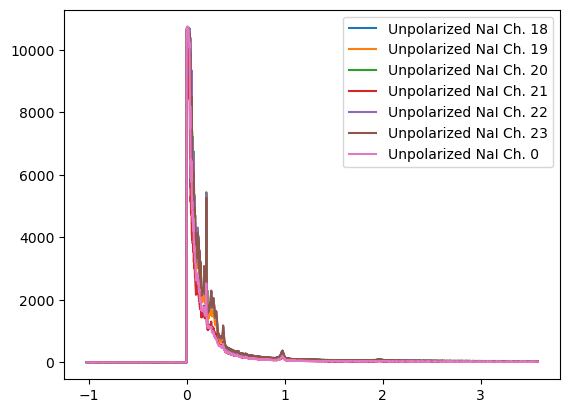

In [12]:
for ch in range(6,13):
    plt.plot(xs,all_unpol[ch]/unpol_numruns, label = 'Unpolarized NaI Ch. ' + str(chan_enab[ch])) ## upstream
plt.legend()

In [13]:
%matplotlib qt

upch = 1
dnch = -1
# plt.plot(xs,all_unpol[upch]/unpol_numruns, label = 'Unpolarized NaI Ch. ' + str(chan_enab[upch])) ## upstream
# plt.plot(xs,all_unpol[dnch]/unpol_numruns, label = 'Unpolarized NaI Ch. ' + str(chan_enab[dnch]))
# plt.plot(xs,all_pol[upch]/pol_numruns, label = 'Polarized NaI Ch. ' + str(chan_enab[upch]))
# plt.plot(xs,all_pol[dnch]/pol_numruns, label = 'Polarized NaI Ch. ' + str(chan_enab[dnch]))
# plt.plot(xs,all_gback[upch]/gback_numruns, label = 'Gamma background NaI Ch. ' + str(chan_enab[upch]))
# plt.plot(xs,all_gback[dnch]/gback_numruns, label = 'Gamma background NaI Ch. ' + str(chan_enab[dnch]))

plt.plot(xs,all_unpol[-1]/unpol_numruns, label = 'Unpolarized 6li') ## 6li
plt.plot(xs,all_pol[-1]/pol_numruns, label = 'Polarized 6li')
plt.plot(xs,all_gback[-1]/gback_numruns, label = 'No-target background, 6li')
plt.plot(xs,((all_pol[-1]/pol_numruns)-(all_gback[-1]/gback_numruns)), label = ' bg subtracted 6li')

plt.title(rf'Polarized, unpolarized, and gamma background spectra', fontsize = 'xx-large')

# plt.xticks(np.arange(-1.0,4.0, 0.5),fontsize = 'large')
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')

plt.ylabel('Counts [arb]',fontsize = 'x-large')
plt.xlabel('tof [ms]',fontsize = 'x-large')

plt.legend(fontsize = 'x-large')
plt.show()

In [14]:
######################## singular temp testing ##########################

In [15]:
folderpath = root+processedfolder+folderslist[1]
with h5py.File("F:/LANL/processed_data/runs09919-10159/pol_D/09920_pol_D.h5", 'r') as f: ## new arr_sizer
    channels = list(f.keys())
    print(channels[-2])
    numchannels = len(channels)-1
    data = f['ch_24/added_pulses/ch_24']
    testT0 = np.array(data)
#     xs = np.array(dataset)
#     numpoints = len(dataset)
#     xs = np.array(dataset)*1e-6 ## now in ms
    f.close()
print(len(testT0))

folderpath = root+processedfolder+folderslist[1]
with h5py.File("F:/LANL/processed_data/runs12364-12684/pol_D/12401_pol_D.h5", 'r') as f: ## new arr_sizer
    channels = list(f.keys())
    print(channels[-2])
    numchannels = len(channels)-1
    data = f['ch_24/added_pulses/ch_24']
    testTn = np.array(data)
#     xs = np.array(dataset)
#     numpoints = len(dataset)
#     xs = np.array(dataset)*1e-6 ## now in ms
    f.close()
print(len(testT0))

ch_24
8992
ch_24
8992


In [16]:
print(len(testT0))

Npol_Nunpol = testTn[1997:]/testT0[1997:]

plt.plot(xs[1997:], Npol_Nunpol) 
plt.plot

8992


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

In [17]:
## below shows gback is almost negligible

In [18]:
plt.plot(all_gback[1]/unpol_numruns)

plt.plot(all_unpol[1]/unpol_numruns)
plt.plot((all_unpol[1]/unpol_numruns)-(all_gback[1]/gback_numruns))

In [19]:
testT0_2 = (all_unpol[-1])/unpol_numruns
testTn_2 = (all_pol[-1])/pol_numruns
print(len(testT0_2))

Npol_Nunpol_2 = testTn_2[1997:]/testT0_2[1997:]
plt.plot(xs[1997:], Npol_Nunpol_2) 

8992


In [20]:
######################## ##################### ##########################

In [22]:
all_unpol_nogback = (all_unpol/unpol_numruns) - (all_gback/gback_numruns) ## normalized by # runs here !!
all_pol_nogback = (all_pol/pol_numruns) - (all_gback/gback_numruns)

# plt.plot(all_pol_gback[2])
plt.plot(all_unpol_nogback[-1])
plt.plot(all_pol_nogback[-1])
plt.plot(all_gback[-1]/gback_numruns)

plt.show()

In [23]:
%matplotlib qt
## this is just gback 

all_unpol_noLa = all_unpol_nogback-(all_unpol/unpol_numruns)
all_pol_noLa = all_pol_nogback - (all_pol/pol_numruns)

plt.plot(all_unpol_noLa[4])
plt.plot(all_pol_noLa[4])
plt.plot(all_gback[4])
plt.show()

In [24]:
T0 = all_unpol_nogback
Tn = all_pol_nogback
plt.plot(T0[-1])
plt.plot(Tn[-1])

plt.plot((Tn/T0)[-1])


In [26]:
ch = 5
pol_test = ((1-((T0[ch][2000:])**2/(Tn[ch][2000:])**2)))
pol_test = ((1-((T0[ch+1][2000:])**2/(Tn[ch+1][2000:])**2)))
pol_test = ((1-((T0[ch+2][2000:])**2/(Tn[ch+2][2000:])**2)))

# plt.plot(li6pol_test)

In [27]:
plt.plot(all_gback[-1])
plt.plot(all_gback[0])

In [36]:
all_pol_cut=all_pol_nogback[:,2001:]
all_unpol_cut=all_unpol_nogback[:,2001:]
xs_cut = xs[2001:]

print(len(all_pol))


# print(len(all_pol[0]))
# print(len(all_unpol[0]))
# # all_unpol_cut = all_unpol[]
# print(all_pol[0:2,1991:2000])
# plt.plot(all_pol[0][1992:2000])
# plt.xlim(0,15)

# print(all_pol[:,1992:])
print(len(all_pol_cut))
print(len(all_pol_cut[0]))
plt.plot(xs_cut,all_unpol_cut[0])

25
25
6991


In [37]:
T0 = all_unpol_cut
Tn = all_pol_cut
print(T0[0][20:30])
print(T0[0][20:30]/np.max(T0))

print(1-(T0[0][20:30]/np.max(T0)))
print(len(np.max(T0, axis = 1)))
print(T0[1]/(np.max(T0, axis = 1))[1])

[10342.4890174  10337.55042109 10353.89715171 10356.97385168
 10375.7459822  10367.1469335  10375.69765378 10375.0444857
 10377.69228943 10389.92727729]
[0.99191518 0.99144154 0.9930093  0.99330438 0.99510475 0.99428005
 0.99510012 0.99503747 0.99529142 0.99646484]
[0.00808482 0.00855846 0.0069907  0.00669562 0.00489525 0.00571995
 0.00489988 0.00496253 0.00470858 0.00353516]
25
[0.87200744 0.89931844 0.91446844 ... 0.00321848 0.00339592 0.00342872]


In [39]:
## testing with no cutting
# P^2 = 1-T0^2/Tn^2

%matplotlib qt
ch = 2
T0 = all_unpol_cut
Tn = all_pol_cut
T0_maxs = np.max(T0, axis = 1)
T0_maxs = T0_maxs.reshape(-1,1) ## reshape into a column for dividing
Tn_maxs = np.max(Tn, axis = 1)
Tn_maxs = Tn_maxs.reshape(-1,1) ## reshape into a column for dividing

T0_test = T0/T0_maxs
Tn_test = Tn/Tn_maxs
# plt.plot((1-Tn_test[0])/(1-T0_test[0]))

print(T0_test[1][30:40])
print(1-T0_test[1][30:40])


for ch in range(9,15):
# polarization = np.sqrt(1-((all_unpol[0]/unpol_numruns)**2/(all_pol[0]/pol_numruns)**2))
    polarization = (np.sqrt(1-((1-T0_test[ch])**2/(1-Tn_test[ch])**2)))
    plt.plot(xs_cut, polarization, label ='ch '+str(chan_enab[ch]))
# polarization6Li = np.sqrt((1-((T0[-1])**2/(Tn[-1])**2)))



# plt.axvline(x=5820, ls='--')
# plt.plot(polarization)
# plt.plot(xs_cut, polarization6Li/np.max(polarization6Li), label ='6Li')
# plt.plot(polarization6Li_2, label ='6Li')
# plt.plot(xs_cut, (1-T0_test[ch])**2, label ='testing')
# plt.plot(xs_cut, (1-Tn_test[ch])**2, label ='testing')

plt.title(rf'Polarization attempt with g detectors', fontsize = 'xx-large')

# plt.xticks(np.arange(-1.0,4.0, 0.5),fontsize = 'large')
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')

plt.ylabel('absolute??',fontsize = 'x-large')
plt.xlabel('tof [ms]',fontsize = 'x-large')

plt.legend(fontsize = 'x-large')
plt.show()

plt.legend()
# plt.plot(all_unpol_D[0])

# plt.yscale('log')
# plt.ylim(-10,10)
# plt.xlim(2000,10000)


[0.99290381 0.99211528 0.99160458 0.99208758 0.99309078 0.99281162
 0.98784378 0.97438345 0.96587934 0.9778832 ]
[0.00709619 0.00788472 0.00839542 0.00791242 0.00690922 0.00718838
 0.01215622 0.02561655 0.03412066 0.0221168 ]


C:\Users\gabeo\AppData\Local\Temp\ipykernel_20892\3323011939.py:23: RuntimeWarning: divide by zero encountered in true_divide
  polarization = (np.sqrt(1-((1-T0_test[ch])**2/(1-Tn_test[ch])**2)))
C:\Users\gabeo\AppData\Local\Temp\ipykernel_20892\3323011939.py:23: RuntimeWarning: invalid value encountered in sqrt
  polarization = (np.sqrt(1-((1-T0_test[ch])**2/(1-Tn_test[ch])**2)))


In [98]:
##### just plotting 6Li ###### 

T0 = all_unpol_cut
Tn = all_pol_cut

polarization6Li = np.sqrt((1-((T0[-1])**2/(Tn[-1])**2)))

plt.plot(xs_cut,polarization6Li, label = '6Li') ## 6li
# plt.plot(xs,all_pol[-1]/pol_numruns, label = 'Polarized 6li')

plt.title(rf'Polarization, sqrt(1-T0^2/Tn^2)', fontsize = 'xx-large')

# plt.xticks(np.arange(-1.0,4.0, 0.5),fontsize = 'large')
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')

plt.ylabel('absolute??',fontsize = 'x-large')
plt.xlabel('tof [ms]',fontsize = 'x-large')

plt.legend(fontsize = 'x-large')
plt.show()

In [21]:
# m = 8
# # a = All_Li6_asyms
# a = All_NaI_asyms
# b = a.reshape(-1, m).mean(axis=1)
# c = xs_cut[0]
# d = c.reshape(-1, m).mean(axis=1)
# print(len(a))
# print(len(b))
# print(len(d))

def rebin(ys, xs, rebinfactor):
    outys = ys.reshape(-1, rebinfactor).mean(axis=1)
    outxs = xs.reshape(-1, rebinfactor).mean(axis=1)
    return outys, outxs

rebinf = 20

all_unpol_cut_rebin8 = []
all_pol_cut_rebin8 = []
xs_cut_rebin8 = []

for i in range(len(all_unpol)):
    all_unpol_cut_rebin8.append(rebin(all_unpol_cut[i], xs_cut, rebinf)[0])
    all_pol_cut_rebin8.append(rebin(all_pol_cut[i], xs_cut, rebinf)[0])
    xs_cut_rebin8.append(rebin(all_pol_cut[i], xs_cut, rebinf)[1])
#     all_pol_cut_rebin8[i], xs_cut_rebin8 = rebin(all_pol_cut[i], xs_cut, rebinf)

print(len(all_unpol_cut_rebin8))
print(len(all_unpol_cut_rebin8[0]))

print(len(xs_cut_rebin8))
xs_cut_rebin8 = xs_cut_rebin8[0]
plt.plot(xs_cut_rebin8,all_unpol_cut_rebin8[0] )
plt.plot(xs_cut_rebin8,all_unpol_cut_rebin8[-1] )
plt.plot(xs_cut_rebin8,all_pol_cut_rebin8[-1] )
# plt.plot(xs_cut_rebin8,all_pol_cut_rebin8[-1]-all_unpol_cut_rebin8[-1] )


25
350
25


### plot rebinned pol and N number of NaI detectors, with 6Li

In [22]:
# T0 = np.asarray(all_unpol_cut_rebin8)*-1
# print(type(T0))
# print(len(T0))

In [23]:
## traditional one

%matplotlib qt
ch = 2
T0 = np.asarray(all_unpol_cut_rebin8)
Tn = np.asarray(all_pol_cut_rebin8)

print(len(all_unpol[ch]))
print(len(all_pol[ch]))

print(pol_numruns)
print(unpol_numruns)

for ch in range(9,15):
# polarization = np.sqrt(1-((all_unpol[0]/unpol_numruns)**2/(all_pol[0]/pol_numruns)**2))
    polarization = ((1-((T0[ch]/unpol_numruns)**2/(Tn[ch]/pol_numruns)**2)))
    plt.plot(xs_cut_rebin8, polarization, label ='ch '+str(ch))
polarization6Li = ((1-((T0[-1]/unpol_numruns)**2/(Tn[-1]/pol_numruns)**2)))

# plt.axvline(x=5820)
# plt.plot(polarization)
plt.title('Polarization squared (1-(T0/Tn)^2), rebinned')
plt.plot(xs_cut_rebin8, polarization6Li, label = '6Li')
plt.legend()

plt.axvline(x = 1.96, ls = '--')
plt.xlabel('ms')
# plt.plot(all_unpol_D[0])

# plt.yscale('log')
# plt.ylim(-10,10)
# plt.xlim(2000,10000)


8992
8992
318
240


Text(0.5, 0, 'ms')

In [59]:
print((xs[1997]))
x_E = 3.895662*10**(-6)*(1/(xs[1997:]*10**(-9))**2)
print(x_E[1])

512.0
3715192.794799804


In [63]:
testT0 = np.asarray(all_unpol_D[-1][1997:])
testTn = np.asarray(all_pol_D[-1][1997:])
# plt.plot(testTn/testT0)

x_E = 3.895662*10**(-6)*(1/(xs[1997:]*10**(-9))**2)

polarization6Li_old = np.sqrt(np.absolute(1 - (testT0**2/testTn**2)))
plt.plot(polarization6Li_old)
# plt.plot(x_E, polarization6Li_old)

In [71]:
plt.plot(T0[0])
plt.plot(Tn[0])
plt.plot(Tn[0]-T0[0])

In [67]:
## need to bg subtract I guess

plt.plot(xs_cut_rebin8, all_unpol_cut_rebin8[0]*-1)
plt.plot(xs_cut_rebin8, all_unpol_cut_rebin8[-1]*-1)

transmission_testb = all_unpol_cut_rebin8[0][0:181]
print((transmission_testb[-1]))
transmission_teste = all_unpol_cut_rebin8[0][205:]
print((transmission_teste[0]))
transmission_test_bump = all_unpol_cut_rebin8[0][181:205]*-1
print((transmission_test_bump[0]))
print((transmission_test_bump[-1]))
transmission_test = np.concatenate((transmission_testb,transmission_test_bump,transmission_teste))

plt.plot(xs_cut_rebin8, transmission_test, label = 'test')


print(np.where(xs_cut_rebin8 >= 1.96))
plt.axvline(xs_cut_rebin8[192])
plt.axvline(xs_cut_rebin8[181], ls='--',c='r')
plt.axvline(xs_cut_rebin8[205], ls='--',c='r')
plt.legend()


# plt.plot(T0[0])

7677.0618737607265
6810.4682448012845
-7896.932129623005
-7160.378395976388
(array([192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
       218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230,
       231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
       257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269,
       270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282,
       283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295,
       296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308,
       309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321,
       322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334,
       335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347,
       348, 349], dtype=int64),)


In [38]:
## modified for NaI, trying other things

%matplotlib qt
ch = 2
T0 = all_unpol_cut[:,15:]
Tn = all_pol_cut[:,15:]
x_E = 3.895662*10**(-6)*(1/(xs_cut[15:]*10**(-3))**2)

print(len(T0[ch]))
print(len(Tn[ch]))

print(pol_numruns)
print(unpol_numruns)

for ch in range(9,15):
# polarization = np.sqrt(1-((all_unpol[0]/unpol_numruns)**2/(all_pol[0]/pol_numruns)**2))
    polarization = np.sqrt(((((T0[ch]-1)/unpol_numruns)**2/((Tn[ch]-1)/pol_numruns)**2)))
    plt.plot(x_E, polarization, label ='ch '+str(ch))
# polarization6Li = np.sqrt(np.abs(1-((T0[-1]/unpol_numruns)**2/(Tn[-1]/pol_numruns)**2)))

# plt.axvline(x=5820)
# plt.plot(polarization)
plt.title('testing')
# plt.plot(x_E, polarization6Li, label = '6Li')
plt.legend()

# plt.axvline(x = 1.96, ls = '--')
plt.xlabel('??')
# plt.plot(all_unpol_D[0])

# plt.yscale('log')
# plt.ylim(-10,10)
# plt.xlim(2000,10000)


6985
6985
318
240


Text(0.5, 0, '??')

In [23]:
print(np.where(xs_cut ==0))
print(xs_cut)

(array([4], dtype=int64),)
[-2.048000e-03 -1.536000e-03 -1.024000e-03 ...  3.580416e+00  3.580928e+00
  3.581440e+00]


In [15]:
# same as above but do tn/t0 instead

%matplotlib qt
ch = 2
T0 = all_unpol_cut_rebin8
Tn = all_pol_cut_rebin8

print(len(all_unpol[ch]))
print(len(all_pol[ch]))

print(pol_numruns)
print(unpol_numruns)

for ch in range(9,15):
# polarization = np.sqrt(1-((all_unpol[0]/unpol_numruns)**2/(all_pol[0]/pol_numruns)**2))
    polarization = ((((Tn[ch]/pol_numruns)/(T0[ch]/unpol_numruns))))
    plt.plot(xs_cut_rebin8, polarization, label ='ch '+str(ch))
polarization6Li = ((((Tn[-1]/pol_numruns)/(T0[-1]/unpol_numruns))))

# plt.axvline(x=5820)
# plt.plot(polarization)
plt.title('Tn/T0, rebinned')
plt.plot(xs_cut_rebin8, polarization6Li, label = '6Li')
plt.legend()

plt.axvline(x = 1.96, ls = '--')
plt.xlabel('ms')
# plt.plot(all_unpol_D[0])

# plt.yscale('log')
# plt.ylim(-10,10)
# plt.xlim(2000,10000)


8992
8992
318
240


Text(0.5, 0, 'ms')

In [159]:
x = 1.96
v = 23/(x/1000)
h = 6.626*10**(-34)
m = 1.675*10**(-27)

l = h/(m*v)*10**(10) ## in A
print(l)

0.33710473718364686


In [160]:
d = 23
l2 = 2*10**(-10)
t = l2*d*m/h
print(t*1000)

11.628433444008454


In [177]:
d = 23
l3 = l/(10**-10)
c = 3*10**8
eV = 6.242*10**18

E = 0.5*m*(d/(1.96/1000))**2
print(E*eV)

0.7198667417221992


In [174]:
t_to_eV = 0.5*(1.6749286*10**(-27))*((27.3/(1.96/1000))**2*(6.24151*10**18))
print(t_to_eV)

1.0140727783806702


In [52]:
%matplotlib qt
ch = 2

print(len(all_unpol[ch]))
print(len(all_pol[ch]))

print(pol_numruns)
print(unpol_numruns)

for ch in range(0,3):
# polarization = np.sqrt(1-((all_unpol[0]/unpol_numruns)**2/(all_pol[0]/pol_numruns)**2))
    polarization = (1-((all_unpol[ch]/unpol_numruns)**2/(all_pol[ch]/pol_numruns)**2))
    plt.plot(polarization, label ='ch '+str(ch))
polarization6Li = (1-((all_unpol[-1]/unpol_numruns)**2/(all_pol[-1]/pol_numruns)**2))

plt.axvline(x=5820)
# plt.plot(polarization)
plt.plot(polarization6Li)
# plt.plot(all_unpol_D[0])

# plt.yscale('log')
# plt.ylim(-10,10)
# plt.xlim(2000,10000)


8992
8992
330
240


In [100]:
plt.plot(all_unpol[2]/240)
plt.plot(all_pol[2]/330)
plt.plot(all_unpol[0]/all_pol[0])
plt.show()

In [76]:
%matplotlib qt

print(len(all_pol_U))
print(len(all_pol_U[0]))
# print(len(testsum[0][0]))
for i in range(0,13):
    plt.plot(xs, all_unpol_U[i])
plt.show()

13
8992


/processed_data/runs12034-12363
2


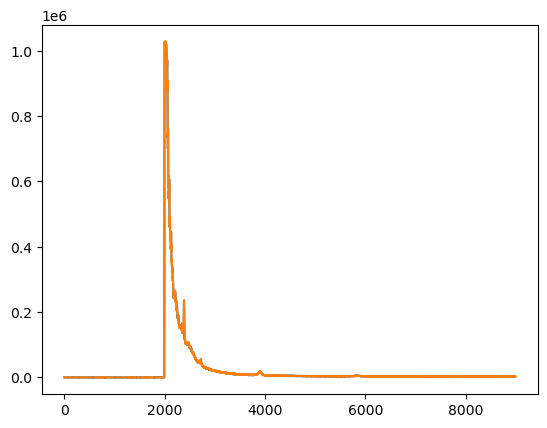

In [18]:
unpolpath = processedfolder+pol
print(unpolpath)
print(len(data))
plt.plot(data[0])
plt.plot(data[1])

In [5]:
print(channels[0][:2]+' '+channels[0][3:5])

ch 00


In [ ]:
polarization = 1 - 

## This is for looking a ch. 29 in norm files! not pulse add

In [60]:
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd

os.chdir('F:/LANL/')
root = os.getcwd()
processedfolder = '/SF_Norm_files/'

search_arr = sorted(os.listdir(root + processedfolder))
print(search_arr)

testfol = 'runs'+'16453-16763/'
print('runs: ' ,processedfolder+testfol)

# with h5py.File('F:/LANL/processed_data/runs12364-12684/pol_D/12364_pol_D' + '.h5', 'r') as f: ## new arr_sizer
#     dataset = f['ch_00/added_pulses/ch_00']
#     data = np.array(dataset)
#     xs = np.array(f['xs '])
#     f.close()
# print(len(arr_sizer))
# print(len(arr_sizer[0]))
folderslist = [testfol]
# if folders_start == folders_end:
#     currfolder = search_arr[start_i]+'/'
#     folderslist.append(currfolder)
# else:
#     for f in (start_i, end_i):
# #         print(f)
# #         print(search_arr[f])
#         currfolder = root+processedfolder+search_arr[f]
#         currfolder = search_arr[f]+'/'
#         print(currfolder)
#         folderslist.append(currfolder)
# #     runslist_D[f] = sorted(os.listdir(root+processedfolder+folders_start+'/asym_D'))
# #     runslist_U[f] = sorted(os.listdir(root+processedfolder+folders_start+'/asym_U'))

print(folderslist)
## change below to multiple folders?
normfiles = sorted(os.listdir(root+processedfolder+folderslist[0])) ## has to be changed to an array

# runslist_bg_D = sorted(os.listdir(root+processedfolder+folders_start+'/asym_bg_D')) ## has to be changed to an array
# runslist_bg_U = sorted(os.listdir(root+processedfolder+folders_start+'/asym_bg_U'))

normfiles_numruns = len(normfiles)
print(normfiles_numruns)

# run_asyms_D = np.zeros((numruns,len(arr_sizer),len(arr_sizer[0])), dtype=float)
# print(len(run_asyms_D))
# print(len(run_asyms_D[0]))
# print(len(run_asyms_D[0][0]))
# print(len(runslist_D))
# print(len(runslist_U))
# print(len(((sorted(os.listdir(root+processedfolder+dir+'/asym_D'))))))

# folder_arr = []

# dir = folders_start + folders_start

# for dir in search_arr[start_i:end_i+1]:
#     run_asyms_D = np.zeros((numruns,len(arr_sizer),len(arr_sizer[0])), dtype=float)
#     print(dir)
#     print('later')

['La_sample', 'SFdaq_runs', 'TR_R_expected_avgs_stds.csv', 'TR_R_expected_avgs_stds_afterclip.csv', 'integral_maxdifferences.xlsx', 'runs07862-08069', 'runs09919-10159', 'runs11139-11412', 'runs11413-11726', 'runs11727-12033', 'runs12034-12363', 'runs12034-12363 - Copy', 'runs12364-12684', 'runs13564-13604', 'runs13605-13735', 'runs13605-13735 - Copy', 'runs13736-13851', 'runs13852-14191', 'runs14500-15106', 'runs15114-15568', 'runs15569-16110', 'runs16453-16763']
runs:  /SF_Norm_files/runs16453-16763/
['runs16453-16763/']
263


In [61]:
print(normfiles[6:])
normfiles = normfiles[6:]

['16455.h5', '16456.h5', '16457.h5', '16458.h5', '16459.h5', '16460.h5', '16461.h5', '16462.h5', '16463.h5', '16464.h5', '16465.h5', '16466.h5', '16467.h5', '16468.h5', '16469.h5', '16470.h5', '16471.h5', '16472.h5', '16473.h5', '16474.h5', '16475.h5', '16476.h5', '16478.h5', '16479.h5', '16480.h5', '16481.h5', '16483.h5', '16484.h5', '16485.h5', '16487.h5', '16490.h5', '16491.h5', '16492.h5', '16493.h5', '16494.h5', '16495.h5', '16496.h5', '16497.h5', '16498.h5', '16499.h5', '16501.h5', '16503.h5', '16504.h5', '16506.h5', '16507.h5', '16508.h5', '16511.h5', '16512.h5', '16513.h5', '16514.h5', '16515.h5', '16516.h5', '16517.h5', '16518.h5', '16519.h5', '16522.h5', '16523.h5', '16524.h5', '16525.h5', '16526.h5', '16527.h5', '16528.h5', '16529.h5', '16530.h5', '16531.h5', '16532.h5', '16533.h5', '16534.h5', '16535.h5', '16536.h5', '16538.h5', '16539.h5', '16540.h5', '16541.h5', '16542.h5', '16543.h5', '16544.h5', '16545.h5', '16547.h5', '16548.h5', '16549.h5', '16551.h5', '16552.h5', '16

In [62]:
with h5py.File(root+processedfolder+folderslist[0]+normfiles[0], 'r') as f: ## new arr_sizer
    print(list(f.keys()))
#     numchannels = len(channels)-1
    dataset = f['df_1/block2_values']   ## this is the xs dataset
    testdataset = np.array(dataset)
#     numpoints = len(dataset)
#     xs = np.array(dataset)*1e-6 ## now in ms
    f.close()
print(testdataset.flatten())

['df_0', 'df_1']
[2096 2096 2096 ... 2096 2096 2096]


In [63]:
normdatas = []
for i in range(0,len(normfiles)):
    with h5py.File(root+processedfolder+folderslist[0]+normfiles[i], 'r') as f: ## new arr_sizer
#         print(list(f.keys()))
    #     numchannels = len(channels)-1
        dataset = f['df_1/block2_values']   ## this is the xs dataset
        testdataset = np.array(dataset)
        testdataset = testdataset.flatten()
    #     numpoints = len(dataset)
    #     xs = np.array(dataset)*1e-6 ## now in ms
        f.close()
    normdatas.append(testdataset)
print(len(normdatas))

257


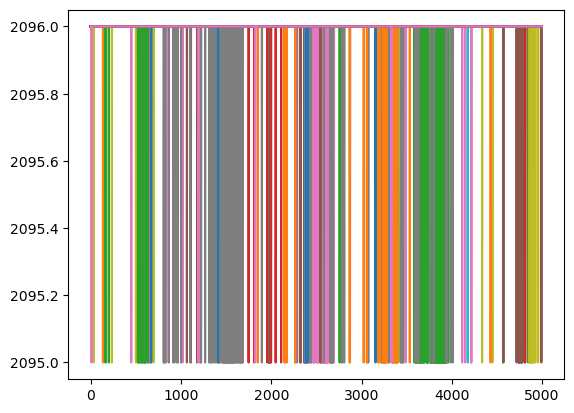

In [64]:
for i in range(0,len(normdatas)):
    plt.plot(normdatas[i])

In [6]:
numsequences = []
run_ON_D = []
run_ON_U = []

run_OFF_D = []
run_OFF_U = []
# totnumchan = len(run_asyms_D[0])+len(run_asyms_U_noLi[0])

numsequences = []
folderpath = root+processedfolder+folderslist[0]  ## generalize this to all folders

for i in range(0,len(runslist_D)):
    runname = folderpath+'/ONOFF_D/'+runslist_D[i]
    print(runname)
    with h5py.File(runname, 'r') as f:
        channels = list(f.keys())
        numchannels = len(channels)-1
        num_seq = f.attrs.get('sequences')
        numsequences.append(num_seq)
        rundat = []
#             print(str(np.char.zfill(str(chan_enab[i]),2)))
#             dataset = f['ch '+str(np.char.zfill(str(chan_enab[i]), 2))]
        for i in range(0,numchannels):
            dataset = f[channels[i]+'/added_pulses/'+channels[i][:2]+' '+channels[i][3:5]]  ##change this to match channels[i]
            ON_data = np.array(dataset[0])
            rundat.append(ON_data)
            OFF_data = np.array(dataset[1])
            run_OFF_D.append(OFF_data)
        run_ON_D.append(rundat)
        f.close()
        folderpath = root+processedfolder+folderslist[0]  ## generalize this to all folders

F:\LANL/processed_data/runs12034-12363//ONOFF_D/12034_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12035_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12036_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12037_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12038_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12039_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12040_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12041_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12042_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12043_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12044_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12045_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12046_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12047_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12048_ONOFF_D.h5
F:\LANL/processed_data/ru

F:\LANL/processed_data/runs12034-12363//ONOFF_D/12167_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12168_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12169_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12170_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12171_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12172_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12173_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12174_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12175_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12176_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12177_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12178_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12179_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12180_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12181_ONOFF_D.h5
F:\LANL/processed_data/ru

F:\LANL/processed_data/runs12034-12363//ONOFF_D/12299_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12300_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12301_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12302_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12303_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12304_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12305_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12306_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12307_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12308_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12309_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12310_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12311_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12312_ONOFF_D.h5
F:\LANL/processed_data/runs12034-12363//ONOFF_D/12313_ONOFF_D.h5
F:\LANL/processed_data/ru

In [7]:
%matplotlib qt
run_ON_D = np.asarray(run_ON_D)
run_ON_U = np.asarray(run_ON_U)

run_OFF_D = np.asarray(run_OFF_D)
run_OFF_U = np.asarray(run_OFF_U)
print(run_ON_D.shape)
print(len(run_ON_D[0]))
print(len(run_ON_D[0][0]))
# print(len(run_ON_U[0]))
# print(len(run_ON_U[0][0]))
for ch in range(12):
    plt.plot(xs,run_ON_D[0][ch])

(330, 13, 8992)
13
8992


### now bg fit each run's ON

In [8]:
from scipy import odr
from scipy.special import voigt_profile
from scipy.optimize import curve_fit

bg_region1_beg = 4180
bg_region1_end = 5450
bg_region2_beg = 6250
bg_region2_end = 8992
bg_reg1 = [bg_region1_beg,bg_region1_end]
bg_reg2 = [bg_region2_beg,bg_region2_end]
fullrange = bg_reg2[1]-bg_reg1[0]

In [9]:
print(numruns)
print(numpoints)

330
8992


In [10]:

## change to 2nd order poly in cleaned up version
# start = time.time()

def bg_fitsubtract(bef_res_reg, aft_res_reg, ys): ## before/after resonance region [start:end] respectively, ys[ch] to fit
    binstot = aft_res_reg[1]-bef_res_reg[0]  ## total number of bins in whole region
    x1 = np.arange(bef_res_reg[0], bef_res_reg[1],1)
    x2 = np.arange(aft_res_reg[0], aft_res_reg[1],1)
    x = np.append(x1,x2)
    fullx = np.arange(bef_res_reg[0], aft_res_reg[1],1) ## an array of every x bin in entire region
#     ys_bgsub = []
    fitdata1 = ys[bef_res_reg[0]: bef_res_reg[1]]
    fitdata2 = ys[aft_res_reg[0]: aft_res_reg[1]]
    datasplice = np.append(fitdata1, fitdata2)
    y = datasplice
    data = odr.Data(x, y)
    poly_model2 = odr.polynomial(2)  # using third order polynomial model
    odr_obj = odr.ODR(data, poly_model2)
    output = odr_obj.run()  # running ODR fitting
    poly2 = np.poly1d(output.beta[::-1])
    poly_y2 = poly2(x)
    fullpoly_y2 = poly2(fullx)
    bgsubtracted = ys[bef_res_reg[0]:aft_res_reg[1]] - fullpoly_y2  ## subtracts RealData-BackgroundFit
#     ys_bgsub.append(bgsubtracted)
    return bgsubtracted

## background subtraction currently only for NaI detectors
num_fittingchs = len(run_ON_D[0])-1  ## removes the Li detector, assumes it is there
# numpoints = len(run_ON_D[0][0])
ON_bgsub = np.zeros((numruns,num_fittingchs,fullrange), dtype = np.float64) ## channels, sequences, range of bg_ subtraction
OFF_bgsub = np.zeros((numruns,num_fittingchs,fullrange), dtype = np.float64) ## channels, sequences, range of bg_ subtraction

# for r in range(0, 3):
for r in range(0, numruns):
    print('run '+str(r))
    for i in range(0, num_fittingchs):
#         print(i)
#         if channels[i] == 'ch_24':
#             emessage = ('bg_ fit does not work for 6Li yet')
#             logger.error('run '+run_num + emessage)
#             raise Exception(emessage)
        ON_bgsub[r][i]  = bg_fitsubtract(bg_reg1,bg_reg2, run_ON_D[r][i])
#         OFF_bgsub[r][i] = bg_fitsubtract(bg_reg1,bg_reg2, OFF_sums[r][i])

run 0
run 1
run 2
run 3
run 4
run 5
run 6
run 7
run 8
run 9
run 10
run 11
run 12
run 13
run 14
run 15
run 16
run 17
run 18
run 19
run 20
run 21
run 22
run 23
run 24
run 25
run 26
run 27
run 28
run 29
run 30
run 31
run 32
run 33
run 34
run 35
run 36
run 37
run 38
run 39
run 40
run 41
run 42
run 43
run 44
run 45
run 46
run 47
run 48
run 49
run 50
run 51
run 52
run 53
run 54
run 55
run 56
run 57
run 58
run 59
run 60
run 61
run 62
run 63
run 64
run 65
run 66
run 67
run 68
run 69
run 70
run 71
run 72
run 73
run 74
run 75
run 76
run 77
run 78
run 79
run 80
run 81
run 82
run 83
run 84
run 85
run 86
run 87
run 88
run 89
run 90
run 91
run 92
run 93
run 94
run 95
run 96
run 97
run 98
run 99
run 100
run 101
run 102
run 103
run 104
run 105
run 106
run 107
run 108
run 109
run 110
run 111
run 112
run 113
run 114
run 115
run 116
run 117
run 118
run 119
run 120
run 121
run 122
run 123
run 124
run 125
run 126
run 127
run 128
run 129
run 130
run 131
run 132
run 133
run 134
run 135
run 136
run 137
run 13

In [18]:
r = 19
ch = 5

res_region_beg = bg_region1_end  ##currently res region is not selectable... inside of background region
res_region_end = bg_region2_beg
res_reg = [res_region_beg,res_region_end]
xdata = xs[bg_reg1[0]:bg_reg2[1]]
# xdata = xs[res_reg[0]:res_reg[1]]*1e-6

plt.plot(xs,run_ON_D[r][ch])
plt.plot(xdata, ON_bgsub[r][ch], lw = '1.0', label='trouble run')
plt.plot(xs,run_ON_D[r-1][ch])
plt.plot(xdata, ON_bgsub[r-1][ch], lw = '1.0', label='normal?')
plt.legend()
plt.show()

In [12]:

## change to 2nd order poly in cleaned up version
# start = time.time()

def bg_fitsubtract_np(bef_res_reg, aft_res_reg, ys): ## before/after resonance region [start:end] respectively, ys[ch] to fit
    binstot = aft_res_reg[1]-bef_res_reg[0]  ## total number of bins in whole region
    x1 = np.arange(bef_res_reg[0], bef_res_reg[1],1)
    x2 = np.arange(aft_res_reg[0], aft_res_reg[1],1)
    x = np.append(x1,x2)
    fullx = np.arange(bef_res_reg[0], aft_res_reg[1],1) ## an array of every x bin in entire region
#     ys_bgsub = []
    fitdata1 = ys[bef_res_reg[0]: bef_res_reg[1]]
    fitdata2 = ys[aft_res_reg[0]: aft_res_reg[1]]
    datasplice = np.append(fitdata1, fitdata2)
    y = datasplice
    
#     data = odr.Data(x, y)
#     poly_model2 = odr.polynomial(2)  # using third order polynomial model
#     odr_obj = odr.ODR(data, poly_model2)
#     output = odr_obj.run()  # running ODR fitting
#     poly2 = np.poly1d(output.beta[::-1])
#     poly_y2 = poly2(x)
#     fullpoly_y2 = poly2(fullx)
#     bgsubtracted = ys[bef_res_reg[0]:aft_res_reg[1]] - fullpoly_y2  ## subtracts RealData-BackgroundFit
    
    polyfit_param = np.polyfit(x,y,2)
    p = np.poly1d(polyfit_param)
    poly_y2_np = p(x)
    fullpoly_y2_np = p(fullx)
    bgsubtracted = ys[bef_res_reg[0]:aft_res_reg[1]] - fullpoly_y2_np 
#     ys_bgsub.append(bgsubtracted)
    return bgsubtracted

## background subtraction currently only for NaI detectors
num_fittingchs = len(run_ON_D[0])-1  ## removes the Li detector, assumes it is there
# numpoints = len(run_ON_D[0][0])
ON_bgsub_np = np.zeros((numruns,num_fittingchs,fullrange), dtype = np.float64) ## channels, sequences, range of bg_ subtraction
OFF_bgsub_np = np.zeros((numruns,num_fittingchs,fullrange), dtype = np.float64) ## channels, sequences, range of bg_ subtraction

# for r in range(0, 3):
for r in range(0, numruns):
    print('run '+str(r))
    for i in range(0, num_fittingchs):
#         print(i)
#         if channels[i] == 'ch_24':
#             emessage = ('bg_ fit does not work for 6Li yet')
#             logger.error('run '+run_num + emessage)
#             raise Exception(emessage)
        ON_bgsub_np[r][i]  = bg_fitsubtract_np(bg_reg1,bg_reg2, run_ON_D[r][i])
#         OFF_bgsub[r][i] = bg_fitsubtract(bg_reg1,bg_reg2, OFF_sums[r][i])

run 0
run 1
run 2
run 3
run 4
run 5
run 6
run 7
run 8
run 9
run 10
run 11
run 12
run 13
run 14
run 15
run 16
run 17
run 18
run 19
run 20
run 21
run 22
run 23
run 24
run 25
run 26
run 27
run 28
run 29
run 30
run 31
run 32
run 33
run 34
run 35
run 36
run 37
run 38
run 39
run 40
run 41
run 42
run 43
run 44
run 45
run 46
run 47
run 48
run 49
run 50
run 51
run 52
run 53
run 54
run 55
run 56
run 57
run 58
run 59
run 60
run 61
run 62
run 63
run 64
run 65
run 66
run 67
run 68
run 69
run 70
run 71
run 72
run 73
run 74
run 75
run 76
run 77
run 78
run 79
run 80
run 81
run 82
run 83
run 84
run 85
run 86
run 87
run 88
run 89
run 90
run 91
run 92
run 93
run 94
run 95
run 96
run 97
run 98
run 99
run 100
run 101
run 102
run 103
run 104
run 105
run 106
run 107
run 108
run 109
run 110
run 111
run 112
run 113
run 114
run 115
run 116
run 117
run 118
run 119
run 120
run 121
run 122
run 123
run 124
run 125
run 126
run 127
run 128
run 129
run 130
run 131
run 132
run 133
run 134
run 135
run 136
run 137
run 13

In [31]:
r = 45
ch = 8

res_region_beg = bg_region1_end  ##currently res region is not selectable... inside of background region
res_region_end = bg_region2_beg
res_reg = [res_region_beg,res_region_end]
xdata = xs[bg_reg1[0]:bg_reg2[1]]
# xdata = xs[res_reg[0]:res_reg[1]]*1e-6

plt.plot(xs,run_ON_D[r][ch])
# plt.plot(xdata, ON_bgsub[r][ch], lw = '1.0', label='trouble run')
plt.plot(xdata, ON_bgsub_np[r][ch], lw = '1.0', label='trouble run np version')
plt.plot(xs,run_ON_D[r-1][ch])
plt.plot(xdata, ON_bgsub[r-1][ch], lw = '1.0', label='normal?')
plt.axhline(y = 7430)
plt.axhline(y = 5448)
plt.axvline(x = 1.968)


plt.legend()
plt.show()

In [20]:
print(len(ON_bgsub))
print(len(ON_bgsub[0]))

print(len(ON_bgsub[0][0]))

print(len(run_ON_D))
print(len(run_ON_D[0]))

print(len(run_ON_D[0][0]))


330
12
4812
330
13
8992


In [21]:
r = 19
ch = 5

binstot = bg_reg2[1]-bg_reg1[0]  ## total number of bins in whole region
x1 = np.arange(bg_reg1[0], bg_reg1[1],1)
x2 = np.arange(bg_reg2[0], bg_reg2[1],1)
x = np.append(x1,x2)
fullx = np.arange(bg_reg1[0], bg_reg2[1],1) ## an array of every x bin in entire region
#     ys_bgsub = []
fitdata1 = run_ON_D[r][ch][bg_reg1[0]: bg_reg1[1]]
fitdata2 = run_ON_D[r][ch][bg_reg2[0]: bg_reg2[1]]
datasplice = np.append(fitdata1, fitdata2)
y = datasplice

test = np.polyfit(x,y,2)
print(test)
p = np.poly1d(test)

# data = odr.Data(x, y)
# poly_model2 = odr.polynomial(2)  # using third order polynomial model
# odr_obj = odr.ODR(data, poly_model2)
# output = odr_obj.run()  # running ODR fitting
# poly2 = np.poly1d(output.beta[::-1])
poly_y2_np = p(x)
fullpoly_y2_np = p(fullx)
bgsubtracted = run_ON_D[r][ch][bg_reg1[0]:bg_reg2[1]] - fullpoly_y2_np  ## subtracts RealData-BackgroundFit

[ 1.89915030e-04 -3.22980410e+00  1.73365733e+04]


In [22]:
res_region_beg = bg_region1_end  ##currently res region is not selectable... inside of background region
res_region_end = bg_region2_beg
res_reg = [res_region_beg,res_region_end]
xdata = xs[bg_reg1[0]:bg_reg2[1]]
# xdata = xs[res_reg[0]:res_reg[1]]*1e-6

plt.plot(xs,run_ON_D[r][ch])
plt.plot(xdata, bgsubtracted, lw = '1.0', label='trouble run')
plt.plot(xs,run_ON_D[r][ch])
plt.plot(xdata, ON_bgsub[r][ch], lw = '1.0', label='Old polyfit')
plt.plot(xs,run_ON_D[r-1][ch])
plt.plot(xdata, ON_bgsub[r-1][ch], lw = '1.0', label='normal?')
plt.legend()
plt.show()

In [17]:
# test = np.polyfit(x,y,3)
# print(test)
# p = np.poly1d(test)
# print(p(x))
# plt.plot(np.poly1d(test))
plt.plot(xdata,p(x))

ValueError: x and y must have same first dimension, but have shapes (4812,) and (4012,)

### now voigt fitting

In [23]:
# now voigt

def voigt2(x, sig, gam, xshift, amp):
    fit = voigt_profile(x-xshift, sig, gam)*amp
    return fit

# res_region_beg = 5450
# res_region_end = 6250
res_region_beg = bg_region1_end  ##currently res region is not selectable... inside of background region
res_region_end = bg_region2_beg
res_reg = [res_region_beg,res_region_end]
if res_reg[0] < bg_reg1[1] or res_reg[1]>bg_reg2[0]:
    emessage = ('Declared Background region and Resonance region have overlapping fitting regions')
    logger.error('run '+run_num + emessage)
    raise Exception(emessage)

# xdata = xs[res_reg[0]:res_reg[1]]*1e-6  ## just change all xs to ms and one array
xdata = xs[res_reg[0]:res_reg[1]]  ## just change all xs to ms and one array

# In[22]:

# resonance region is assumed to be in between 2 background regions. Could maybe change this. 11.22.24
# start = time.time()
 
def voigt_fitting(bef_res_reg, aft_res_reg,xs,ys):
    fit_curves = []
    parameters = []
#     for ch in range(0, len(ys)): ## number of sequences, usually 13
    ydata = ys[bef_res_reg[1]-bef_res_reg[0]:aft_res_reg[0]-bef_res_reg[0]] 
    popt, pcov = curve_fit(voigt2, xs, ydata, bounds = ([0,0,0,-np.inf], [np.inf,np.inf,np.inf, np.inf]))
#     popt, pcov = curve_fit(voigt2, xs, ydata)
    fitted_curve = voigt2(xs, popt[0],popt[1],popt[2],popt[3],) ## sigma, gamma, xshift (res. center), amp. related thing
#     fit_curves.append(fitted_curve)
    fit_params = popt
    fit_errs = np.diagonal(pcov)
#     parameters.append([fit_params,fit_errs])
    return fitted_curve, [fit_params,fit_errs]

res_size = res_reg[1]-res_reg[0] 
ON_vfit = np.zeros((len(ON_bgsub),len(ON_bgsub[0]),res_size), dtype = np.float64) ## runs, channels, range of V_ subtraction
OFF_vfit = np.zeros((len(ON_bgsub),len(ON_bgsub[0]),res_size), dtype = np.float64)

ON_vfit_params = np.zeros((len(ON_bgsub),len(ON_bgsub[0]),2,4), dtype = np.float64) ## channels, sequences,[params, param_errs], [sigma, gamma, shift, amp thing]
OFF_vfit_params = np.zeros((len(ON_bgsub),len(ON_bgsub[0]),2,4), dtype = np.float64)

# for r in range(0, numruns): 
# #         if channels[i] == 'ch_24':
# #             emessage = ('bg_ fit does not work for 6Li yet')
# #             logger.error('run '+run_num + emessage)
# #             raise Exception(emessage)
# #         try:
#         ON_vfit[r], ON_vfit_params[r]  = voigt_fitting(bg_reg1,bg_reg2,xdata, ON_bgsub[r])
#         print(r)
# #             OFF_vfit[r][i], OFF_vfit_params[r][i] = voigt_fitting(bg_reg1,bg_reg2,xdata, OFF_bgsub[r][i])
# #         except Exception as e:
# #             logger.error('run '+run_num + ' failed during Voigt fitting')
# #             logger.exception(e)

for r in range(0, numruns): 
    print(r)
    for i in range(0, len(ON_bgsub[0])): 
#         if channels[i] == 'ch_24':
#             emessage = ('bg_ fit does not work for 6Li yet')
#             logger.error('run '+run_num + emessage)
#             raise Exception(emessage)
        try:
            ON_vfit[r][i], ON_vfit_params[r][i]  = voigt_fitting(bg_reg1,bg_reg2,xdata, ON_bgsub_np[r][i])
#             OFF_vfit[r][i], OFF_vfit_params[r][i] = voigt_fitting(bg_reg1,bg_reg2,xdata, OFF_bgsub[r][i])
        except:
            print('still testing this')
            print('run '+str(r)+' ch '+str(i))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
still testing this
run 45 ch 7
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
still testing this
run 128 ch 7
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
still testing this
run 227 ch 0
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253

#### for some reason run=79, ch=11 fails and run=19, ch =5 looks terrible. run=83, ch. 9

#### np version has its own trouble. Look at r = 45, ch = 7. r = 128, ch = 7.

In [24]:
r = 79
ch = 11
xdata = xs[res_reg[0]:res_reg[1]] 
ydata = ON_bgsub[r][ch][bg_reg1[1]-bg_reg1[0]:bg_reg2[0]-bg_reg1[0]]

plt.plot(xdata,ON_vfit[r][ch])
plt.plot(xdata,ydata)
print(ON_vfit_params[r][ch])

[[3.25169444e-02 2.54842367e-02 1.96793778e+00 3.58091374e+02]
 [8.09333616e-06 1.24033622e-05 6.32309609e-07 7.81354484e+01]]


In [91]:
print(len(ON_vfit))
print(len(ON_vfit[0]))
print(len(ON_vfit[0][0]))

330
12
800


In [176]:
## look at fitting manually

r = 45
ch = 7

res_region_beg = 5450
res_region_end = 6250
res_reg = [res_region_beg,res_region_end]
xdata = xs[res_reg[0]:res_reg[1]]
ydata = ON_bgsub[r][ch][bg_reg1[1]-bg_reg1[0]:bg_reg2[0]-bg_reg1[0]]
ydata_np = ON_bgsub_np[r][ch][bg_reg1[1]-bg_reg1[0]:bg_reg2[0]-bg_reg1[0]]

def voigt2(x, sig, gam, xshift, amp):
#     xshift=1.9678
    fit = voigt_profile(x-xshift, sig, gam)*amp
    return fit

# popt, pcov = curve_fit(voigt2, xdata, ydata)
# popt, pcov = curve_fit(voigt2, xdata, ydata, bounds = ([0,0,1.5,-np.inf], [np.inf,np.inf,2.0, np.inf]))
popt, pcov = curve_fit(voigt2, xdata, ydata, bounds = ([0,0,0,-np.inf], [np.inf,np.inf,np.inf, np.inf]))
popt_np, pcov_np = curve_fit(voigt2, xdata, ydata_np, bounds = ([0,0,0,-np.inf], [np.inf,np.inf,np.inf, np.inf]))

print(popt)
print(pcov)

fitted_curve = voigt2(xdata, popt[0],popt[1],popt[2],popt[3],)
fitted_curve_np = voigt2(xdata, popt_np[0],popt_np[1],popt_np[2],popt_np[3],)

print(max(fitted_curve))
print((popt[3])*np.sqrt(2*np.pi))
print((popt[3])/(np.sqrt(2*np.pi)*popt[0]))
print((popt[3])/(popt[0]))
print(sum(fitted_curve)*(popt[0]*np.sqrt(2*np.pi)))

RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

In [177]:
print(ydata[10:20])
plt.plot(xdata, fitted_curve, label = 'regular version')
plt.plot(xdata, fitted_curve_np, label = 'np version')

# plt.plot(xs, ON_bgsub[1][0])
plt.legend()
plt.plot(xdata,ydata)

[ -64.17848146 -167.73496416 -458.12599825  367.63461155  311.708419
 -208.39184397 -330.97554306 -349.31700928  -34.24701699 -199.09877572]


NameError: name 'fitted_curve_np' is not defined

In [ ]:
print('hi')

In [218]:
## try setting things constant for trouble ones
r = 45
ch = 7

res_region_beg = 5450
res_region_end = 6250
res_reg = [res_region_beg,res_region_end]
xdata = xs[res_reg[0]:res_reg[1]]
ydata = ON_bgsub[r][ch][bg_reg1[1]-bg_reg1[0]:bg_reg2[0]-bg_reg1[0]]
# ydata = ON_bgsub_np[r][ch][bg_reg1[1]-bg_reg1[0]:bg_reg2[0]-bg_reg1[0]]

# sig = 
# gam = 
# xshift = 

def voigt3(x, amp):
#     xshift=1.9678
    ## ch 5:
#     s = 0.043253230
#     g = 0.006067
#     res_loc = 1.9698596
    ## ch 11:
#     s = 0.039110152
#     g = 0.012317655539375172
#     res_loc = 1.9617306244821926
    ## ch 9:
#     s = 0.042199785942949083
#     g = 0.0031533887758442643
#     res_loc = 1.962500989185792
    ## ch 7:
    s = 0.042522924601082
    g = 0.0056886589305687055
    res_loc = 1.9674671154674273
#     g = 0
    fit = voigt_profile(x-res_loc, s, g)*amp
    return fit

# popt, pcov = curve_fit(voigt2, xdata, ydata)
# popt, pcov = curve_fit(voigt2, xdata, ydata, bounds = ([0,0,1.5,-np.inf], [np.inf,np.inf,2.0, np.inf]))
popt, pcov = curve_fit(voigt3, xdata, ydata)

print(popt)
print(pcov)

fitted_curve = voigt3(xdata, popt[0],)

# print(max(fitted_curve))
# print((popt[3])*np.sqrt(2*np.pi))
# print((popt[3])/(np.sqrt(2*np.pi)*popt[0]))
# print((popt[3])/(popt[0]))
# print(sum(fitted_curve)*(popt[0]*np.sqrt(2*np.pi)))

print(ydata[10:20])
plt.plot(xdata, fitted_curve)
# plt.plot(xs, ON_bgsub[1][0])
plt.plot(xdata,ydata)

[160.4606207]
[[7.88684477]]
[ -64.17848146 -167.73496416 -458.12599825  367.63461155  311.708419
 -208.39184397 -330.97554306 -349.31700928  -34.24701699 -199.09877572]


In [ ]:
plt.plot(xdata, fitted_curve, label = 'regular version')
plt.plot(xdata, fitted_curve_np, label = 'np version')

# plt.plot(xs, ON_bgsub[1][0])
plt.legend()
plt.plot(xdata,ydata)

In [ ]:
## changing to the constants above seems to be working (except those with bad poly fitting before)

In [79]:
print(ON_vfit[83][9][10:20])
print(ON_vfit_params[83][9][0])
print(ON_vfit_params[83][9][0][2])

print(ON_vfit[83][10][10:20])
print(ON_vfit_params[83][10][0])
print(ON_vfit_params[83][10][0][2])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0.]
0.0
[19.05119416 19.17295857 19.2960278  19.42042326 19.54616688 19.67328107
 19.80178877 19.93171347 20.06307918 20.19591052]
[3.95943782e-02 1.06396179e-02 1.96622946e+00 1.79617545e+02]
1.9662294640152356


In [240]:
ch = 6

## sigma

plt.hist(ON_vfit_params[:,ch,0,0], bins =50, range = [0.00,0.08])
print(np.average(ON_vfit_params[:,ch,0,0]))
print(np.std(ON_vfit_params[:,ch,0,0]))

0.04216987311095615
0.003812914171054736


In [236]:
## gamma

plt.hist(ON_vfit_params[:,ch,0,1], bins =100)
print(np.average(ON_vfit_params[:,ch,0,1]))
print(np.std(ON_vfit_params[:,ch,0,1]))

0.0016052249543663886
0.004258156774544616


In [241]:
## x shift

plt.hist(ON_vfit_params[:,ch,0,2], bins =100, range = [1.95,1.98])
# plt.hist(ON_vfit_params[:,ch,0,2], bins =100)

print(np.average(ON_vfit_params[:,ch,0,2]))
print(np.std(ON_vfit_params[:,ch,0,2]))
print(np.where(ON_vfit_params[:,ch,0,2]==0))


1.9674633825130292
0.0019847494697117747
(array([], dtype=int64),)


In [215]:
print(np.where(ON_vfit_params[:,ch,0,2]==0))
# print(ON_vfit_params[(np.where(ON_vfit_params[:,ch,0,2]!=0)),ch,0,2])
print(np.average(ON_vfit_params[(np.where(ON_vfit_params[:,ch,0,2]!=0)),ch,0,2]))


(array([ 45, 128], dtype=int64),)
1.9674671154674273


In [210]:
s=0
e = 46
print(np.average(ON_vfit_params[s:e,ch,0,2]))


1.9243503465899032


In [18]:
run_asyms_D1 = []
run_asyms_D2 = []

run_asyms_U = []
run_asyms_U_noLi = []
# totnumchan = len(run_asyms_D[0])+len(run_asyms_U_noLi[0])
run_asyms_All = []

numsequences = []
folderpath = root+processedfolder+folderslist[0]  ## generalize this to all folders
# print(folderpath)
# for i in range(0,len(runslist_D)):
#     runname = folderpath+'/asym_D/'+runslist_D[i]
#     print(runname)
#     with h5py.File(runname, 'r') as f:
#         channels = list(f.keys())
#         numchannels = len(channels)-1
#         num_seq = f.attrs.get('sequences')
#         numsequences.append(num_seq)
# #         rundat = []
#         for j in range(0,numchannels):
# #             print(str(np.char.zfill(str(chan_enab[i]),2)))
# #             dataset = f['ch '+str(np.char.zfill(str(chan_enab[i]), 2))]
#             dataset = f[channels[j]+'/OFF/parameters']
#             data = np.array(dataset)
# #             rundat_asym.append(data)
#             run_asyms_D.append(data)
#         f.close()
#         folderpath = root+processedfolder+folderslist[0]  ## generalize this to all folders

for i in range(0,len(runslist_D)):
    runname = folderpath+'/asym_D/'+runslist_D[i]
#     print(runname)
    with h5py.File(runname, 'r') as f:
        channels = list(f.keys())
        numchannels = len(channels)-1
        num_seq = f.attrs.get('sequences')
        numsequences.append(num_seq)
#         rundat = []
#             print(str(np.char.zfill(str(chan_enab[i]),2)))
#             dataset = f['ch '+str(np.char.zfill(str(chan_enab[i]), 2))]
        dataset = f['ch_06/OFF/parameters']
        data = np.array(dataset)
#             rundat_asym.append(data)
        run_asyms_D1.append(data)
        dataset2 = f['ch_06/ON/parameters']
        data2 = np.array(dataset2)
#             rundat_asym.append(data)
        run_asyms_D2.append(data2)
        f.close()
        folderpath = root+processedfolder+folderslist[0]  ## generalize this to all folders
        
# for i in range(0,len(runslist_U)):
#     runname = folderpath+'/asym_U/'+runslist_U[i]
# #     print(runname)
#     with h5py.File(runname, 'r') as f:
#         channels = list(f.keys())
#         numchannels = len(channels)-1
# #         num_seq = f.attrs.get('sequences')
# #         numsequences.append(num_seq)
# #         rundat = []
#         for j in range(0,numchannels):
# #             print(str(np.char.zfill(str(chan_enab[i]),2)))
# #             dataset = f['ch '+str(np.char.zfill(str(chan_enab[i]), 2))]
#             dataset = f[channels[j]]
# #             data = np.array(dataset)
# #             rundat_asym.append(data)
#             run_asyms_U[i][j] = dataset
#         f.close()

In [19]:
print(channels, numchannels, num_seq, numsequences)

['ch_00', 'ch_01', 'ch_02', 'ch_03', 'ch_04', 'ch_05', 'ch_06', 'ch_07', 'ch_08', 'ch_09', 'ch_10', 'ch_11', 'xs '] 12 11 [13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1

In [20]:
run_asyms_D1 = np.asarray(run_asyms_D1)
# print(len(run_asyms_D))
# print(len(run_asyms_D[0]))
# print(len(run_asyms_D[0][0]))
# print(len(run_asyms_D[0][0][0]))
print(run_asyms_D1.shape)
# print(len(run_asyms_D[0][0][0][0]))
# print((run_asyms_D[0]))
# print((run_asyms_D[0][0]))
# print((run_asyms_D[0][0][0]))
# print((run_asyms_D[0][0][0][2]))
# print((run_asyms_D[0:10,:][:][0][:,0,2]))
# print(run_asyms_D)

# print(run_asyms_D.size())
# test = run_asyms_D[0][:]
# print((test))
# test = 
# print(np.average())
print(np.vstack(run_asyms_D1).shape)
test = np.vstack(run_asyms_D1)
test[:,0,2]
print(np.average(test[:,0,0]))

%matplotlib qt
plt.hist(test[:,0,0], bins = 200)
print(np.average(test[:,0,0]))
print(np.std(test[:,0,0]))

(330,)
(4288, 2, 4)
0.03459672996325404
0.03459672996325404
0.01685389255261596


C:\Users\gabeo\AppData\Local\Temp\ipykernel_34628\2011416603.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  run_asyms_D1 = np.asarray(run_asyms_D1)


In [21]:
run_asyms_D2 = np.asarray(run_asyms_D2)
# print(len(run_asyms_D))
# print(len(run_asyms_D[0]))
# print(len(run_asyms_D[0][0]))
# print(len(run_asyms_D[0][0][0]))
print(run_asyms_D2.shape)
# print(len(run_asyms_D[0][0][0][0]))
# print((run_asyms_D[0]))
# print((run_asyms_D[0][0]))
# print((run_asyms_D[0][0][0]))
# print((run_asyms_D[0][0][0][2]))
# print((run_asyms_D[0:10,:][:][0][:,0,2]))
# print(run_asyms_D)

# print(run_asyms_D.size())
# test = run_asyms_D[0][:]
# print((test))
# test = 
# print(np.average())
print(np.vstack(run_asyms_D2).shape)
test2 = np.vstack(run_asyms_D2)
test2[:,0,2]
print(np.average(test2[:,0,0]))

%matplotlib qt
plt.hist(test2[:,0,0], bins = 200)
print(np.average(test2[:,0,0]))
print(np.std(test2[:,0,0]))

(330,)
(4288, 2, 4)
0.0342224996792375
0.0342224996792375
0.016904136721250622


C:\Users\gabeo\AppData\Local\Temp\ipykernel_34628\3054402300.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  run_asyms_D2 = np.asarray(run_asyms_D2)


In [22]:
print(run_asyms_D1.shape)
print(run_asyms_D2.shape)
print(len(test))
print(len(test2))

(330,)
(330,)
4288
4288


In [33]:
plt.hist(test[:,0,0], bins = 200, label = 'Ch 06, OFF states')
plt.hist(test2[:,0,0], bins = 200,label = 'Ch 06, ON states')

plt.legend()
print(np.average(test[:,0,0]))
print(np.std(test[:,0,0]))
print()
print(np.average(test2[:,0,0]))
print(np.std(test2[:,0,0]))
plt.xlabel('ms')
plt.title('sigma value ~'+str(len(run_asyms_D1)*13) +' sequences')

0.03459672996325404
0.01685389255261596

0.0342224996792375
0.016904136721250622


Text(0.5, 1.0, 'sigma value ~4290 sequences')

In [29]:
plt.hist(test2[:,0,1], bins = 200,label = 'Ch 06, ON states')
plt.hist(test[:,0,1], bins = 200, label = 'Ch 06, OFF states')
print(np.average(np.abs(test[:,0,1])))
print(np.std(np.abs(test[:,0,1])))
plt.legend()
plt.xlabel('ms')
plt.title('gamma value ~'+str(len(run_asyms_D1)*13) +' sequences')

0.009343947142149518
0.014317626856111891


Text(0.5, 1.0, 'gamma value ~4290 sequences')

In [31]:
plt.hist(test[:,0,2], bins = 200, label = 'Ch 06, OFF states')
plt.hist(test2[:,0,2], bins = 200,label = 'Ch 06, ON states')
print(np.average(test[:,0,2]))
print(np.std(test[:,0,2]))
print(len(run_asyms_D1))
print(np.average(test2[:,0,2]))
print(np.std(test2[:,0,2]))
plt.legend()

plt.xlabel('tof')
plt.title('x shift ~'+str(len(run_asyms_D1)*13) +' sequences')


1.9678181106932944
0.007745009092118807
330
1.9675429776725626
0.007752263092993295


Text(0.5, 1.0, 'x shift ~4290 sequences')

In [32]:
plt.hist(test[:,0,3], bins = 200, label = 'Ch 06, OFF states')
plt.hist(test2[:,0,3], bins = 200,label = 'Ch 06, ON states')
print(np.average(np.abs(test[:,0,3])))
print(np.std(np.abs(test[:,0,3])))
print(np.average(np.abs(test2[:,0,3])))
print(np.std(np.abs(test2[:,0,3])))
plt.legend()
plt.xlabel('unitless?')
plt.title('Amplitude ~'+str(len(run_asyms_D1)*13) +' sequences')


7.617075863267265
1.4454804296220267
7.460790221387746
1.44191868678733


Text(0.5, 1.0, 'Amplitude ~4290 sequences')

In [9]:
run_asyms_D = np.zeros((numruns,numchannels,numpoints), dtype=float) ## num runs, num channels, num points (one dataset per run per channel)
run_asyms_U = np.zeros((numruns,numchannels,numpoints), dtype=float)
run_asyms_U_noLi = run_asyms_U[:,:-1] ## take out 6Li in upstream (can this be done above?)
totnumchan = len(run_asyms_D[0])+len(run_asyms_U_noLi[0])
run_asyms_All = np.zeros((numruns,totnumchan,numpoints), dtype=float) ## num pulses, num channels, num points (one dataset per pulse per channel)

numsequences = []
folderpath = root+processedfolder+folderslist[0]  ## generalize this to all folders
print(folderpath)
for i in range(0,len(runslist_D)):
    runname = folderpath+'/asym_D/'+runslist_D[i]
#     print(runname)
    with h5py.File(runname, 'r') as f:
        channels = list(f.keys())
        numchannels = len(channels)-1
        num_seq = f.attrs.get('sequences')
        numsequences.append(num_seq)
#         rundat = []
        for j in range(0,numchannels):
#             print(str(np.char.zfill(str(chan_enab[i]),2)))
#             dataset = f['ch '+str(np.char.zfill(str(chan_enab[i]), 2))]
            dataset = f[channels[j]]
#             data = np.array(dataset)
#             rundat_asym.append(data)
            run_asyms_D[i][j] = dataset
        f.close()
        folderpath = root+processedfolder+folderslist[0]  ## generalize this to all folders

for i in range(0,len(runslist_U)):
    runname = folderpath+'/asym_U/'+runslist_U[i]
#     print(runname)
    with h5py.File(runname, 'r') as f:
        channels = list(f.keys())
        numchannels = len(channels)-1
#         num_seq = f.attrs.get('sequences')
#         numsequences.append(num_seq)
#         rundat = []
        for j in range(0,numchannels):
#             print(str(np.char.zfill(str(chan_enab[i]),2)))
#             dataset = f['ch '+str(np.char.zfill(str(chan_enab[i]), 2))]
            dataset = f[channels[j]]
#             data = np.array(dataset)
#             rundat_asym.append(data)
            run_asyms_U[i][j] = dataset
        f.close()

F:\LANL/processed_data/runs12034-12363/


ValueError: could not convert string to float: 'OFF'

In [ ]:
folderpath = root+processedfolder+folderslist[0]
with h5py.File(folderpath+'/asym_bg_D/'+runslist_bg_D[0], 'r') as f: ## new arr_sizer
    dataset = f['ch 00']
    channels = list(f.keys())
    print(channels[-1])
    xsdataset = f[channels[-1]]
#     numchannels = len(channels)-1
    data = np.array(dataset)
    xs_bg = np.array(xsdataset)
    numpoints_bg = len(data)
    f.close()
print(numruns,numchannels,numpoints_bg)
# print(xs_bg)

In [ ]:
run_asyms_bg_D = np.zeros((numruns,numchannels,numpoints_bg), dtype=float) ## num runs, num channels, num points (one dataset per run per channel)
run_asyms_bg_U = np.zeros((numruns,numchannels,numpoints_bg), dtype=float)
run_asyms_bg_U_noLi = run_asyms_bg_U[:,:-1] ## take out 6Li in upstream (can this be done above?)
run_asyms_bg_All = np.zeros((numruns,totnumchan,numpoints_bg), dtype=float) ## num pulses, num channels, num points (one dataset per pulse per channel)

numsequences = []
folderpath = root+processedfolder+folderslist[0]  ## generalize this to all folders
print(folderpath)
for i in range(0,len(runslist_bg_D)):
    runname = folderpath+'/asym_bg_D/'+runslist_bg_D[i]
#     print(runname)
    with h5py.File(runname, 'r') as f:
        channels = list(f.keys())
        numchannels = len(channels)-1
        num_seq = f.attrs.get('sequences')
        numsequences.append(num_seq)
#         rundat = []
        for j in range(0,numchannels):
#             print(str(np.char.zfill(str(chan_enab[i]),2)))
#             dataset = f['ch '+str(np.char.zfill(str(chan_enab[i]), 2))]
            dataset = f[channels[j]]
#             data = np.array(dataset)
#             rundat_asym.append(data)
            run_asyms_bg_D[i][j] = dataset
        f.close()
        folderpath = root+processedfolder+folderslist[0]  ## generalize this to all folders

for i in range(0,len(runslist_bg_U)):
    runname = folderpath+'/asym_bg_U/'+runslist_bg_U[i]
#     print(runname)
    with h5py.File(runname, 'r') as f:
        channels = list(f.keys())
        numchannels = len(channels)-1
#         num_seq = f.attrs.get('sequences')
#         numsequences.append(num_seq)
#         rundat = []
        for j in range(0,numchannels):
#             print(str(np.char.zfill(str(chan_enab[i]),2)))
#             dataset = f['ch '+str(np.char.zfill(str(chan_enab[i]), 2))]
            dataset = f[channels[j]]
#             data = np.array(dataset)
#             rundat_asym.append(data)
            run_asyms_bg_U[i][j] = dataset
        f.close()

In [ ]:
print(len(run_asyms_All))
print(len(run_asyms_All[0]))
print(len(run_asyms_All[0]))

run_asyms_U_noLi = run_asyms_U[:,:-1] ## take out 6Li in upstream (can this be done above?)
for i in range(numruns):
    run_asyms_All[i] = np.vstack((run_asyms_U_noLi[i], run_asyms_D[i]))

In [ ]:
print(len(run_asyms_bg_All))
print(len(run_asyms_bg_All[0]))
print(len(run_asyms_bg_All[0]))

run_asyms_bg_U_noLi = run_asyms_bg_U[:,:-1] ## take out 6Li in upstream (can this be done above?)
for i in range(numruns):
    run_asyms_bg_All[i] = np.vstack((run_asyms_bg_U_noLi[i], run_asyms_bg_D[i]))


In [ ]:
ch_asyms_All = run_asyms_All.transpose(1, 0, 2) ## switches first array to channels and second array to pulses
ch_asyms_bg_All = run_asyms_bg_All.transpose(1, 0, 2) ## switches first array to channels and second array to pulses


In [ ]:
print(len(run_asyms_D))
print(len(run_asyms_U_noLi))
print(len(run_asyms_All))
print()
print(len(run_asyms_D[0]))
print(len(run_asyms_U_noLi[0]))
print(len(run_asyms_All[0]))
print()
print(len(run_asyms_D[0][0]))
print(len(run_asyms_U_noLi[0][0]))
print(len(run_asyms_All[0][0]))

In [ ]:
print(len(run_asyms_bg_D))
print(len(run_asyms_bg_U_noLi))
print(len(run_asyms_bg_All))
print()
print(len(run_asyms_bg_D[0]))
print(len(run_asyms_bg_U_noLi[0]))
print(len(run_asyms_bg_All[0]))
print()
print(len(run_asyms_bg_D[0][0]))
print(len(run_asyms_bg_U_noLi[0][0]))
print(len(run_asyms_bg_All[0][0]))

In [ ]:
# print(len(rundat_asym[0]))
print((run_asyms_U[7][-1]))
print((run_asyms_D[7][-1]))
print((run_asyms_U[7][-2]))
print((run_asyms_U_noLi[7][-1]))
print()
print((run_asyms_All[7][-2]))
print((run_asyms_All[7][-1]))

print()
print((run_asyms_U[0][0][500:520]))
print((run_asyms_U[0][1][500:520]))
print((run_asyms_U[0][6][500:520]))
print((run_asyms_U[1][0][500:520]))
print((run_asyms_U[1][6][500:520]))
print((run_asyms_U[5][9][500:520]))
print((run_asyms_U[14][12][500:520]))

In [ ]:
print(len(numsequences))
print((numsequences))

In [ ]:
## need to fix on off so that it is ON arr then OFF arr

rundat_ONOFF = []
numsequences = []
folderpath = root+processedfolder+folderslist[0]  ## generalize this to all folders
print(folderpath)
for i in range(0,len(runslist_D)):
    runname = folderpath+'/asym_D/'+runslist_D[i]
    print(runname)
    with h5py.File(runname, 'r') as f:
        channels = list(f.keys())
        numchannels = len(channels)-1
        num_sequence = f.attrs.get('sequences')
        numsequences.append(num_sequence)
#         rundat = []
        for i in range(0,numchannels):
#             print(str(np.char.zfill(str(chan_enab[i]),2)))
#             dataset = f['ch '+str(np.char.zfill(str(chan_enab[i]), 2))]
            dataset = f[channels[i]]
            data = np.array(dataset)
            rundat_ONOFF.append(data)
        f.close()

In [ ]:
# ## re-wrote the file...
# f = h5py.File(root+processedfolder+folderslist[0]+'asym_D/'+runslist_D[0], 'w') ## loads first run of first folder
# f.name
# dset = f.create_dataset("test", (14,8992))
# f.close()

In [10]:
# f = h5py.File(root+processedfolder+folderslist[0]+'asym_D/'+runslist_D[0], 'a')

# grp = f.create_group("subgroup")

In [11]:
## old?

with h5py.File('F:/LANL/processed_data/La_sample/asym_D/11143_asym_D' + '.h5', 'r') as f:
    print(f.attrs.keys())
    print(f.attrs.get('sequences'))
    print(f.attrs.get('rownames'))
    num_sequence = f.attrs.get('sequences')
    dataset = f['ch 00']
    data = np.array(dataset)
    f.close()
print(num_sequence)
print(dataset)
print(data)
print(len(data))

with h5py.File('F:/LANL/processed_data/La_sample/ONOFF_D/11143_ONOFF_D' + '.h5', 'r') as f:
    num_sequence = f.attrs.get('sequences')
    runONOFF = []
    for i in range(0,len(chan_enab)):
        print(str(np.char.zfill(str(chan_enab[i]),2)))
        dataset = f['ch '+str(np.char.zfill(str(chan_enab[i]), 2))]
        data = np.array(dataset)
        runONOFF.append(data)
    f.close()

<KeysViewHDF5 ['sequences']>
13
None
13
<Closed HDF5 dataset>
[ 2.2999511   0.69548797 -0.58615785 ... -0.05485336 -0.11336868
 -0.03639685]
8992


NameError: name 'chan_enab' is not defined

In [ ]:
print(num_sequence)
# print(dataset)
# print(data)
print(len(runONOFF)) ## channels
print(len(runONOFF[0])) ## ON + OFF arrays
print(len(runONOFF[0][0])) ## num points in each ON or OFF array

In [ ]:
print(h5py.File(root+processedfolder+folderslist[0]+'asym_D/'+runslist_D[0], 'r')['ch 00']) ## loads first run of first folder

In [ ]:
# for i in range(numruns):
#     run_asyms_D[i] = np.load(root+processedfolder+folders_start+'/asym_D/'+runslist_D[i])
#     run_asyms_U[i] = np.load(root+processedfolder+folders_start+'/asym_U/'+runslist_U[i])
#     run_asyms_U_noLi[i] = run_asyms_U[i,:-1].copy()
#     run_asyms_All[i] = np.vstack((run_asyms_U_noLi[i], run_asyms_D[i]))


In [ ]:
print(len(run_asyms_D))
print(len(run_asyms_U_noLi))
print(len(run_asyms_All))
print()
print(len(run_asyms_D[0]))
print(len(run_asyms_U_noLi[0]))
print(len(run_asyms_All[0]))
print()
print(len(run_asyms_D[0][0]))
print(len(run_asyms_U_noLi[0][0]))
print(len(run_asyms_All[0][0]))

In [ ]:
print(len(rundat_ONOFF))
print(len(rundat_ONOFF[0]))

In [ ]:
# ## need to make this into function and faster

# run_asyms_D = np.zeros((13,numruns,len(arr_sizer[0])), dtype=float) ## num channels, num runs each channel, num points (one dataset per channel per pulse)
# run_asyms_U = np.zeros((13,numruns,len(arr_sizer[0])), dtype=float) ## num channels, num runs each channel, num points (one dataset per pulse per channel)
# run_asyms_U_noLi = np.zeros((12,numruns,len(arr_sizer[0])), dtype=float) ## take out 6Li in upstream (can this be done above?)
# run_asyms_All = np.zeros((25,numruns,len(arr_sizer[0])), dtype=float) ##num channels, num pulses each ch, num points (one dataset per pulse per channel)
# temp_D = np.zeros((numruns,len(arr_sizer),len(arr_sizer[0])), dtype=float) ## num pulses, num channels, num points (one dataset per pulse per channel)
# temp_U = np.zeros((numruns,len(arr_sizer),len(arr_sizer[0])), dtype=float) ## num pulses, num channels, num points (one dataset per pulse per channel)
# temp_U_noLi = np.zeros((numruns,len(arr_sizer)-1,len(arr_sizer[0])), dtype=float) ## take out 6Li in upstream (can this be done above?)
# temp_All = np.zeros((numruns,25,len(arr_sizer[0])), dtype=float) ## num pulses, num channels, num points (one dataset per pulse per channel)


# print(len(run_asyms_U_noLi))
# print(len(run_asyms_U_noLi[-1]))
# print(len(run_asyms_U_noLi[-1][0]))
# print(len(run_asyms_U))
# print(len(run_asyms_U[-1]))
# print(len(run_asyms_U[-1][0]))

# # for r in range((numruns)): ## for every run
# # #     print(p)
# # #     print(runslist_D[r])
# #     temp_D[r] = np.load(root+processedfolder+folders_start+'/asym_D/'+runslist_D[r])
# #     temp_U[r] = np.load(root+processedfolder+folders_start+'/asym_U/'+runslist_U[r])
# # #     run_asyms_U_noLi[i] = run_asyms_U[i,:-1].copy()
# # #     run_asyms_All[i] = np.vstack((run_asyms_U_noLi[i], run_asyms_D[i]))
# #     for i in range(len(run_asyms_U)): ## for every channel
# #         run_asyms_D[i] = temp_D[r][i]
# #         run_asyms_U[i] = temp_U[r][i]
# # #         run_asyms_All[i] = np.vstack((run_asyms_U_noLi[i], run_asyms_D[i]))
# # #         print((run_asyms_D[0][-1][1500:1510]))
# # #         print((run_asyms_U[0][-1][1500:1510]))

# # run_asyms_U_noLi[:] = run_asyms_U[:-1,:].copy()
# # run_asyms_All[:] = np.vstack((run_asyms_U_noLi[:], run_asyms_D[:]))

# for r in range(numruns):
#     temp_D[r] = np.load(root+processedfolder+folders_start+'/asym_D/'+runslist_D[r])
#     temp_U[r] = np.load(root+processedfolder+folders_start+'/asym_U/'+runslist_U[r])
#     temp_U_noLi[r] = temp_U[r,:-1].copy()
# #     temp_All[r] = np.vstack((run_asyms_U_noLi[r], run_asyms_D[r]))
    
# for i in range(len(run_asyms_U)): ## for every channel
#     for r in range(numruns):
#         run_asyms_D[i][r] = temp_D[r][i]
#         run_asyms_U[i][r] = temp_U[r][i]
# #         run_asyms_All[i] = np.vstack((run_asyms_U_noLi[i], run_asyms_D[i]))
# #         print((run_asyms_D[0][-1][1500:1510]))
# #         print((run_asyms_U[0][-1][1500:1510]))

# #         run_asyms_U_noLi[i] = run_asyms_U[i][:-1].copy()
# #     run_asyms_All[i] = np.vstack((run_asyms_U_noLi[i], run_asyms_D[i]))

# run_asyms_U_noLi[:] = temp_U_noLi[:,:-1].copy()
# run_asyms_All[:] = np.vstack((run_asyms_U_noLi[:], run_asyms_D[:]))
    
# print(len(run_asyms_U_noLi))
# print(len(run_asyms_U_noLi[0]))
# print(len(run_asyms_U_noLi[0][0]))
# print(len(run_asyms_D))
# print(len(run_asyms_D[0]))
# print(len(run_asyms_D[0][0]))

# print(len(run_asyms_All))
# print(len(run_asyms_All[0]))
# print(len(run_asyms_All[0][0]))

# print((run_asyms_U_noLi[0][50][5000:5010]))
# print((run_asyms_All[0][50][5000:5010]))
# print((run_asyms_D[0][50][5000:5010]))

# print((run_asyms_D[-1][50][5000:5010]))
# print((run_asyms_All[-1][50][5000:5010]))

In [ ]:
# print((run_asyms_U_noLi[0][150][5000:5010]))
# print((run_asyms_All[0][150][5000:5010]))
# print((run_asyms_D[0][150][5000:5010]))

# print((run_asyms_D[-1][150][5000:5010]))
# print((run_asyms_All[-1][150][5000:5010]))

In [ ]:
## need to make this into function and faster

# run_asyms_D = np.zeros((numruns,len(arr_sizer),len(arr_sizer[0])), dtype=float) ## num pulses, num channels, num points (one dataset per pulse per channel)
# run_asyms_U = np.zeros((numruns,len(arr_sizer),len(arr_sizer[0])), dtype=float) ## num pulses, num channels, num points (one dataset per pulse per channel)
# run_asyms_U_noLi = np.zeros((numruns,len(arr_sizer)-1,len(arr_sizer[0])), dtype=float) ## take out 6Li in upstream (can this be done above?)
# run_asyms_All = np.zeros((numruns,25,len(arr_sizer[0])), dtype=float) ## num pulses, num channels, num points (one dataset per pulse per channel)


# for i in range(numruns):
#     run_asyms_D[i] = np.load(root+processedfolder+folders_start+'/asym_D/'+runslist_D[i])
#     run_asyms_U[i] = np.load(root+processedfolder+folders_start+'/asym_U/'+runslist_U[i])
#     run_asyms_U_noLi[i] = run_asyms_U[i,:-1].copy()
#     run_asyms_All[i] = np.vstack((run_asyms_U_noLi[i], run_asyms_D[i]))
    
print(len(run_asyms_U_noLi))
print(len(run_asyms_U_noLi[0]))
print(len(run_asyms_U_noLi[0][0]))
print(len(run_asyms_D))
print(len(run_asyms_D[0]))
print(len(run_asyms_D[0][0]))

print(len(run_asyms_All))
print(len(run_asyms_All[0]))
print(len(run_asyms_All[0][0]))

# ch_asyms_All = run_asyms_All.transpose(1, 0, 2) ## switches first array to channels and second array to pulses

print(len(ch_asyms_All))
print(len(ch_asyms_All[0]))
print(len(ch_asyms_All[0][0]))

print((ch_asyms_All[0][0][0:5]))
print((run_asyms_U_noLi[0][0][0:5]))
print((run_asyms_D[0][0][0:5]))
print()
print((ch_asyms_All[-1][0][0:5]))
print((run_asyms_D[0][-1][0:5]))
print()
print((ch_asyms_All[12][0][0:5]))
print((run_asyms_D[0][0][0:5]))
print((ch_asyms_All[11][0][0:5]))
print((run_asyms_U_noLi[0][-1][0:5]))
print()
print((ch_asyms_All[-1][0][0:5]))
print((ch_asyms_All[-1][-1][0:5]))

# print((run_asyms_U_noLi[0][0][0:5]))
# print((run_asyms_D[0][0][0:5]))

# print((run_asyms_All[0][0][0:5]))
# print((run_asyms_All[0][-1][0:5]))
# print((run_asyms_D[0][-1][0:5]))


In [ ]:
# print((new_run_asyms_All[0][1][0:5]))
# print((new_run_asyms_All[0][0][0:5]))

# print((new_run_asyms_All[2][-1][0:5]))
# print((new_run_asyms_All[2][-2][0:5]))

In [ ]:
print(len(run_asyms_D))
print(len(run_asyms_D[0]))
print(len(run_asyms_D[0][0]))

In [ ]:

xs_cut = np.load(root+processedfolder+'xs_cut.npy')
xs_uncut = np.load(root+processedfolder+'xs_uncut.npy')
xs_cut = xs_cut/1000000
xs_uncut = xs_uncut/1000000  ## convert to ms...

print(len(xs_cut))
print(len(xs_cut[0]))

print(len(xs_uncut))
print(len(xs_uncut[0]))

In [ ]:
print(xs_bg[0])
print(xs_cut[0][4180])
print(xs_bg[-1])
print(xs_cut[0][-1])
print(xs_cut[0][8990])



In [ ]:
xs_bg_ms= xs_cut[0][xs_bg[0]:-1]
print(xs_bg_ms)
xs_bg_ms2 = (xs_bg-1996)*(32*16)/1000000
print(xs_bg_ms2)
xs_bg_ms3= xs_uncut[0][xs_bg[0]:xs_bg[-1]]
print(xs_bg_ms3)

In [ ]:
All_Li6_asyms = np.zeros((numpoints), dtype=float) ## num points
for r in range(len(ch_asyms_All[0])):
    All_Li6_asyms = All_Li6_asyms + ch_asyms_All[-1][r]
All_Li6_asyms = All_Li6_asyms/numruns
    
NaI_asyms = np.zeros((len(ch_asyms_All)-1, numpoints), dtype=float) ## num points
for i in range(24): ## 0-11, (24 is 6Li)
    for r in range(len(ch_asyms_All[0])):
        NaI_asyms[i] = NaI_asyms[i] + ch_asyms_All[i][r]
NaI_asyms = NaI_asyms/numruns
        
All_NaI_asyms = np.zeros((numpoints), dtype=float) ## num points
for i in range(24): ## 0-23, not 0-24 (24 is 6Li)
    for r in range(len(ch_asyms_All[0])):
        All_NaI_asyms = All_NaI_asyms + ch_asyms_All[i][r]
All_NaI_asyms = All_NaI_asyms/numruns

upstrm = np.zeros((numpoints), dtype=float) ## num points
for i in range(0,12): ## 0-23, not 0-24 (24 is 6Li)
    print(i)
    for r in range(len(ch_asyms_All[0])):
#         print(upstrm[0:10])
        upstrm = upstrm + ch_asyms_All[i][r]
upstrm = upstrm/numruns
print()
dnstrm = np.zeros((numpoints), dtype=float) ## num points
for i in range(12,24): ## 0-23, not 0-24 (24 is 6Li)
    print(i)
    for r in range(len(ch_asyms_All[0])):
        dnstrm = dnstrm + ch_asyms_All[i][r]
dnstrm = dnstrm/numruns
# Upstrm_NaI_asyms = np.zeros((len(arr_sizer[0])), dtype=float) ## num points
# for i in range(12): ## 0-11, (24 is 6Li)
#     for r in range(len(ch_asyms_All[0])):
#         Upstrm_NaI_asyms = Upstrm_NaI_asyms + ch_asyms_All[i][r]

# Dnstrm_NaI_asyms = np.zeros((len(arr_sizer[0])), dtype=float) ## num points

# for i in range(12,24): ## 12-23, not 12-24 (24 is 6Li)
# #     print( i )
#     Dnstrm_NaI_asyms = Dnstrm_NaI_asyms + ch_asyms_All[i]

print(len(All_NaI_asyms))
print(len(All_Li6_asyms))
print()

print(len(NaI_asyms))
print(len(NaI_asyms[0]))
# print(len(Upstrm_NaI_asyms))
# print(len(Dnstrm_NaI_asyms))


In [ ]:
All_Li6_asyms_bg = np.zeros((numpoints_bg), dtype=float) ## num points
for r in range(len(ch_asyms_bg_All[0])):
    All_Li6_asyms_bg = All_Li6_asyms_bg + ch_asyms_bg_All[-1][r]
All_Li6_asyms_bg = All_Li6_asyms_bg/numruns
    
NaI_asyms_bg = np.zeros((len(ch_asyms_bg_All)-1, numpoints_bg), dtype=float) ## num points
for i in range(24): ## 0-11, (24 is 6Li)
    for r in range(len(ch_asyms_bg_All[0])):
        NaI_asyms_bg[i] = NaI_asyms_bg[i] + ch_asyms_bg_All[i][r]
NaI_asyms_bg = NaI_asyms_bg/numruns
        
All_NaI_asyms_bg = np.zeros((numpoints_bg), dtype=float) ## num points
for i in range(24): ## 0-23, not 0-24 (24 is 6Li)
    for r in range(len(ch_asyms_bg_All[0])):
        All_NaI_asyms_bg = All_NaI_asyms_bg + ch_asyms_bg_All[i][r]
All_NaI_asyms_bg = All_NaI_asyms_bg/numruns

upstrm = np.zeros((numpoints_bg), dtype=float) ## num points
for i in range(0,12): ## 0-23, not 0-24 (24 is 6Li)
    print(i)
    for r in range(len(ch_asyms_bg_All[0])):
#         print(upstrm[0:10])
        upstrm = upstrm + ch_asyms_bg_All[i][r]
upstrm = upstrm/numruns
print()
dnstrm = np.zeros((numpoints_bg), dtype=float) ## num points
for i in range(12,24): ## 0-23, not 0-24 (24 is 6Li)
    print(i)
    for r in range(len(ch_asyms_bg_All[0])):
        dnstrm = dnstrm + ch_asyms_bg_All[i][r]
dnstrm = dnstrm/numruns
# Upstrm_NaI_asyms_bg = np.zeros((len(arr_sizer[0])), dtype=float) ## num points
# for i in range(12): ## 0-11, (24 is 6Li)
#     for r in range(len(ch_asyms_bg_All[0])):
#         Upstrm_NaI_asyms_bg = Upstrm_NaI_asyms_bg + ch_asyms_bg_All[i][r]

# Dnstrm_NaI_asyms_bg = np.zeros((len(arr_sizer[0])), dtype=float) ## num points

# for i in range(12,24): ## 12-23, not 12-24 (24 is 6Li)
# #     print( i )
#     Dnstrm_NaI_asyms_bg = Dnstrm_NaI_asyms_bg + ch_asyms_bg_All[i]

print(len(All_NaI_asyms_bg))
print(len(All_Li6_asyms_bg))
print()

print(len(NaI_asyms_bg))
print(len(NaI_asyms_bg[0]))
# print(len(Upstrm_NaI_asyms_bg))
# print(len(Dnstrm_NaI_asyms_bg))


In [ ]:
# print(numruns)
# # print(upstrm)
# print(len(ch_asyms_All[9]))
# print((ch_asyms_All[9]))
print(ch_asyms_All[9][7])

In [ ]:
print(len(run_asyms_U_noLi))
print(run_asyms_U_noLi[20,11,2000:2010])
print(run_asyms_U_noLi[20][11][2000:2010])

print(len(run_asyms_U_noLi[0:330,11,2000:2010]))
print(len(run_asyms_U_noLi[0:330][11][2000:2010]))

# print((run_asyms_U_noLi[0][5][4000:4010]*330))
print(np.average(run_asyms_U_noLi[0:380,11,7900]*330))
print(NaI_asyms[11][7900])

In [ ]:
m = 8
# a = All_Li6_asyms
a = All_NaI_asyms
b = a.reshape(-1, m).mean(axis=1)
c = xs_cut[0]
d = c.reshape(-1, m).mean(axis=1)
print(len(a))
print(len(b))
print(len(d))

def rebin(ys, xs, rebinfactor):
    outys = ys.reshape(-1, rebinfactor).mean(axis=1)
    outxs = xs.reshape(-1, rebinfactor).mean(axis=1)
    return outys, outxs

rebinf = 8
All_NaI_asyms_rebin8, xs_cut_rebin8 = rebin(All_NaI_asyms, xs_cut[0], rebinf)
All_Li6_asyms_rebin8, xs_cut_rebin8 = rebin(All_Li6_asyms, xs_cut[0], rebinf)

print(len(All_NaI_asyms_rebin8))
print(len(xs_cut_rebin8))

In [ ]:
print(ch_asyms_All[0][0])
print(ch_asyms_All[15][0])
print(run_asyms_U_noLi[0][0])
print(run_asyms_U_noLi[3][0])
print(run_asyms_D[0][0])
print(run_asyms_D[3][0])

print(numruns)
print(upstrm)
print(dnstrm)
print(All_NaI_asyms)

In [18]:
# legend = []
%matplotlib qt

# plt.plot(xs_uncut[0], NaI_asyms[1] , label='NaI D1')
# plt.plot(xs_cut[0], NaI_asyms[1] , label='NaI D1')
# plt.plot(xs_cut[0], All_NaI_asyms/(24), label='All NaI')
plt.plot(xs_cut[0], (All_NaI_asyms/(24)), label='All NaI, no rebinning: ')
# plt.plot(xs_cut[0], (upstrm/(12)), label='upstrm, no rebinning: ')
# plt.plot(xs_cut[0], (dnstrm/(12)), label='dnstrm, no rebinning: ')

# plt.plot(xs_cut[0], (All_Li6_asyms), label='Li6, no rebinning: ')
# plt.plot(xs_cut_rebin8, (All_NaI_asyms_rebin8/(24)), label='All NaI, rebinning: ' + str(rebinf))
# plt.plot(xs_cut_rebin8, (All_Li6_asyms_rebin8), label='Li6, rebinning: ' + str(rebinf))

# plt.plot(xs_uncut[0], NaI_asyms[7] , label='NaI D1')
# plt.plot(d, b/24, label='All NaI')

# plt.plot(xs_uncut[0], All_Li6_asyms , label='6Li')
# plt.plot(xs_cut, All_Li6_asyms/4275 , label='6Li')
# plt.plot(d, b, label='6Li')

    
plt.title(f'asym, {numruns} runs, (' + str(numruns*4/60) + ' hours)') 
plt.xlabel("time from trigger (ms)")
plt.ylabel('absolute')

plt.ylim(-0.5,0.5)
# plt.xlim(xs_cut[1800],xs_cut[-1])
# plt.xlim(xs_uncut[0][1800],xs_uncut[0][-1])

# plt.axvline(xs[0][baseL], ls = '--')
# plt.axvline(xs[0][baseR], ls = '--')
# plt.axvline(xs_cut[1][7800], ls = '--', c ='g')
plt.axvline(xs_cut[1][7500], ls = '--', c ='r')
plt.axvline(xs_cut[1][7200], ls = '--', c ='r')

#plt.axvline(xs[1][intgrR], ls = '--', c ='g')
#plt.axvline(xs[2][HeintgrL], ls = '--', c ='r')
#plt.axvline(xs[2][HeintgrR], ls = '--', c ='r')

plt.legend()
plt.show()

NameError: name 'xs_cut' is not defined

In [28]:
print(np.round(All_NaI_asyms))
print(len(All_NaI_asyms))
print(max(All_NaI_asyms))
print((All_NaI_asyms[1993:2010]/24))
testbin = All_NaI_asyms[1993:]
print(len(testbin))
print(max(testbin))
print(min(testbin))
testbin2 = testbin+(-min(testbin))

[ 37.  -2. 115. ...   0.  -0.  -0.]
8992
25999.565525264814
[-9.95044979e-04 -7.62900556e-05 -4.14109419e-05 -4.12743442e-05
 -4.12203063e-05 -4.11685699e-05 -4.09245156e-05 -4.03186987e-05
 -3.92749640e-05 -3.69528353e-05 -3.65772075e-05 -3.58732753e-05
 -3.43094229e-05 -3.38552945e-05 -3.29173043e-05 -3.36112304e-05
 -3.34357901e-05]
6999
0.05548575720817054
-0.2802082942145837


In [29]:
# legend = []
%matplotlib qt

plt.plot(xs_cut[0][1993:], testbin2, label='All NaI, no rebinning: ')

plt.title(f'asym, {numruns} runs, (' + str(numruns*4/60) + ' hours)') 
plt.xlabel("time from trigger (ms)")
plt.ylabel('absolute')

plt.ylim(-0.5,0.5)

plt.legend()
plt.show()

In [182]:
bins = len(testbin2)
hist, bin_edges = np.histogram(testbin2, bins=bins)
print(hist)
print(bin_edges)
print(hist[200:300])
print(max(hist))
print(len(hist))

[1 0 0 ... 0 0 1]
[0.00000000e+00 4.79631449e-05 9.59262899e-05 ... 3.35598125e-01
 3.35646088e-01 3.35694051e-01]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
26
6999


In [191]:
testend_beg = testbin[0]-testbin[0]
plt.bar(bin_edges[:-1], hist, width = max(hist)/len(hist))  ## this plots the previous histogram !!!
# plt.xlabel('nC')
# plt.title('end-beg region pulse integrals run ' + run_num)
plt.show() 

In [150]:
binnum = 7000
# np.histogram(All_NaI_asyms, bins = binnum, range = [0, 4000])
plt.hist(testbin, bins = binnum, range = [0, 0.05])


(array([1., 3., 2., ..., 0., 0., 0.]),
 array([0.00000000e+00, 7.14285714e-06, 1.42857143e-05, ...,
        4.99857143e-02, 4.99928571e-02, 5.00000000e-02]),
 <BarContainer object of 7000 artists>)

In [165]:
import numpy as np
import ROOT

x= np.random.rand(1,100)

h1   = root.TH1D( 'h1', 'Test random', 100, 0., 1.5 )
h1.Fill(x)

c = root.TCanvas()
c.Draw()
h1.Draw()

ModuleNotFoundError: No module named 'ROOT'

In [31]:
# legend = []
%matplotlib qt

# plt.plot(xs_uncut[0], NaI_asyms[1] , label='NaI D1')
# plt.plot(xs_cut[0], NaI_asyms[1] , label='NaI D1')
# plt.plot(xs_cut[0], All_NaI_asyms/(24), label='All NaI')
plt.plot(xs_bg_ms, (All_NaI_asyms_bg/(24)), label='All NaI, no rebinning: ')
# plt.plot(xs_cut[0], (upstrm/(12)), label='upstrm, no rebinning: ')
# plt.plot(xs_cut[0], (dnstrm/(12)), label='dnstrm, no rebinning: ')

# plt.plot(xs_cut[0], (All_Li6_asyms), label='Li6, no rebinning: ')
# plt.plot(xs_cut_rebin8, (All_NaI_asyms_rebin8/(24)), label='All NaI, rebinning: ' + str(rebinf))
# plt.plot(xs_cut_rebin8, (All_Li6_asyms_rebin8), label='Li6, rebinning: ' + str(rebinf))

# plt.plot(xs_uncut[0], NaI_asyms[7] , label='NaI D1')
# plt.plot(d, b/24, label='All NaI')

# plt.plot(xs_uncut[0], All_Li6_asyms , label='6Li')
# plt.plot(xs_cut, All_Li6_asyms/4275 , label='6Li')
# plt.plot(d, b, label='6Li')

    
plt.title(f'asym, {numruns} runs, (' + str(numruns*4/60) + ' hours)') 
plt.xlabel("time from trigger (ms)")
plt.ylabel('absolute')

# plt.ylim(-0.5,0.5)
# # plt.xlim(xs_cut[1800],xs_cut[-1])
# # plt.xlim(xs_uncut[0][1800],xs_uncut[0][-1])

# # plt.axvline(xs[0][baseL], ls = '--')
# # plt.axvline(xs[0][baseR], ls = '--')
# # plt.axvline(xs_cut[1][7800], ls = '--', c ='g')
# plt.axvline(xs_cut[1][7500], ls = '--', c ='r')
# plt.axvline(xs_cut[1][7200], ls = '--', c ='r')

#plt.axvline(xs[1][intgrR], ls = '--', c ='g')
#plt.axvline(xs[2][HeintgrL], ls = '--', c ='r')
#plt.axvline(xs[2][HeintgrR], ls = '--', c ='r')

plt.legend()
plt.show()

In [16]:
print(root+processedfolder+folders_start+'/asym_D/'+runslist_D[1])

F:\LANL/processed_data/runs12034-12363/asym_D/12035_asym_D.npy


In [17]:
# xs_uncut = np.load(root+processedfolder+'xs_uncut.npy')
# print(len(xs_uncut[0]))

9000


In [16]:
testload0 = np.load(root+processedfolder+folders_start+'/asym_D/'+runslist_D[0])
testload1 = np.load(root+processedfolder+folders_start+'/asym_D/'+runslist_D[1])
testload2 = np.load(root+processedfolder+folders_start+'/asym_D/'+runslist_D[2])
testload3 = np.load(root+processedfolder+folders_start+'/asym_D/'+runslist_D[3])
testload4 = np.load(root+processedfolder+folders_start+'/asym_D/'+runslist_D[4])
testload5 = np.load(root+processedfolder+folders_start+'/asym_D/'+runslist_D[5])
testload6 = np.load(root+processedfolder+folders_start+'/asym_D/'+runslist_D[6])
testload7 = np.load(root+processedfolder+folders_start+'/asym_D/'+runslist_D[7])
testload8 = np.load(root+processedfolder+folders_start+'/asym_D/'+runslist_D[8])
testload9 = np.load(root+processedfolder+folders_start+'/asym_D/'+runslist_D[9])
testload10 = np.load(root+processedfolder+folders_start+'/asym_D/'+runslist_D[10])
testload11 = np.load(root+processedfolder+folders_start+'/asym_D/'+runslist_D[11])
testload12 = np.load(root+processedfolder+folders_start+'/asym_D/'+runslist_D[12])
testload13 = np.load(root+processedfolder+folders_start+'/asym_D/'+runslist_D[13])
testload14 = np.load(root+processedfolder+folders_start+'/asym_D/'+runslist_D[14])
testload15 = np.load(root+processedfolder+folders_start+'/asym_D/'+runslist_D[15])
testloads = [testload1, testload2, testload3, testload4, testload5, testload6, testload7, testload8, testload9, testload10, testload11, testload12, testload13, testload14, testload15, testload0]

print(len(testload0))
print(len(testload0[0]))


13
8992


In [17]:
print(type(testload12))
print(len(testload12))
print(len(testload12[1]))
print(testload12[1][2100:2110])

print(type(testload1))
print(len(testload1))
print(len(testload1[1]))
print(testload1[1][2100:2110])

<class 'numpy.ndarray'>
13
8992
[ 0.00545513 -0.00232839  0.00913183  0.00257728 -0.00176993  0.00101849
  0.00163765  0.00434007  0.00353119  0.00101663]
<class 'numpy.ndarray'>
13
8992
[ 0.00149679 -0.00161068 -0.00074242 -0.0005354  -0.00117681 -0.00113059
  0.0050438  -0.00223947 -0.00453362 -0.00859197]


In [18]:
testa = np.array([1,4,10])
testb = np.array([6,2,-1])
tests = [testa, testb]

print(np.sum(tests, axis =0))
print(testa+testb)

[7 6 9]
[7 6 9]


In [19]:
alltests = np.zeros((len(testload1),len(testload1[0])), dtype=np.float64)
for i in range(len(testloads)):
    for ch in range(len(testloads[0])):
        alltests = np.add(alltests,testloads[i][ch])



In [20]:
# alltests = np.sum(testloads, axis =0)
print(len(alltests))
print(len(alltests[0]))
print(alltests[-1][2100:2110])
print(testloads[-1][2][2100:2110])

13
8992
[ 0.06580914 -0.00674936  0.01945315 -0.04193713  0.00197393  0.0245911
  0.07918334  0.07143564  0.00753719  0.00066482]
[ 0.00239088  0.00161905 -0.00045938 -0.00167427  0.00082221  0.00120667
 -0.00058788 -0.00259709  0.00513048  0.00540297]


In [23]:
# legend = []
%matplotlib qt

# plt.plot(xs_uncut[0], alltests[0] , label='alltests')
# plt.plot(xs_uncut[0], testload1[1] , label='testload1')
# plt.plot(xs_cut[0], NaI_asyms[0] , label='NaI D1')
# plt.plot(xs_cut, NaI_asyms[5] , label='NaI D1')
# plt.plot(xs_cut, NaI_asyms[19] , label='NaI D1')
# plt.plot(xs_cut, NaI_asyms[21] , label='NaI D1')

# plt.plot(xs_cut, ch_asyms[2] , label='NaI D1')
# plt.plot(xs_cut, All_NaI_asyms/24, label='All NaI')
# plt.plot(d, b/24, label='All NaI')

# plt.plot(xs_cut, All_Li6_asyms , label='6Li')
# plt.plot(xs_cut, All_Li6_asyms/4275 , label='6Li')
# plt.plot(d, b, label='6Li')

    
plt.title('asym') 
plt.xlabel("time from trigger (ns)")
plt.ylabel("ADC")

plt.ylim(-3,3)
# plt.xlim(xs_cut[1800],xs_cut[-1])
plt.xlim(xs_uncut[0][1800],xs_uncut[0][-1])

# plt.axvline(xs[0][baseL], ls = '--')
# plt.axvline(xs[0][baseR], ls = '--')
#plt.axvline(xs[1][intgrL], ls = '--', c ='g')
#plt.axvline(xs[1][intgrR], ls = '--', c ='g')
#plt.axvline(xs[2][HeintgrL], ls = '--', c ='r')
#plt.axvline(xs[2][HeintgrR], ls = '--', c ='r')

plt.legend()
plt.show()

In [18]:
a = np.array([[2,6,8,9,30], [2,6,8,9,30]*4])
b = np.array([[1,3,2,3,10], [2,6,8,9,30]*2])
c = np.divide(a,b)
print(c)

C:\Users\gabeo\AppData\Local\Temp\ipykernel_85532\1335267064.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.array([[2,6,8,9,30], [2,6,8,9,30]*4])
C:\Users\gabeo\AppData\Local\Temp\ipykernel_85532\1335267064.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  b = np.array([[1,3,2,3,10], [2,6,8,9,30]*2])


TypeError: unsupported operand type(s) for /: 'list' and 'list'

In [24]:
import os
import numpy as np
os.chdir('F:/LANL/processed_data/')

searchfolder = 'F:/LANL/processed_data/'
search_arr = sorted(os.listdir(os.getcwd()))
print(search_arr)
print(search_arr[0])
folder_start = 'runs'+'12034-12363'
folder_end = 'runs'+'12364-12684'
# folder_end = 'testother2'
print(folder_start)
start_i = search_arr.index(folder_start)
end_i = search_arr.index(folder_end)
print(start_i)
print(end_i)

firstfile = sorted(os.listdir(searchfolder+folder_start+'/asym_D'))[0]
arr_sizer = np.load(searchfolder+folder_start+'/asym_D/'+firstfile)
print(arr_sizer)
print(len(search_arr[start_i:end_i+1]))
print(len(arr_sizer))
print(len(arr_sizer[0]))
# print(len(arr_size[0][0]))
numruns = len(sorted(os.listdir(searchfolder+folder_start+'/asym_D')))
# print(numruns)
# run_asyms = np.zeros((numruns,len(arr_sizer),len(arr_sizer[0])), dtype=float)
# print(len(run_asyms))
# print(len(run_asyms[0]))
# print(len(run_asyms[0][0]))

folder_arr = []

# dir = folder_start + folder_start
for dir in search_arr[start_i:end_i+1]:
    run_asyms = np.zeros((numruns,len(arr_sizer),len(arr_sizer[0])), dtype=float)
    # folder_arr.append(run_asyms)
    print(dir)
    for file in ((sorted(os.listdir(searchfolder+dir+'/asym_D')))):
        # print(file)
        if file[-5] == 'U': ## Up and Down stream. Case sensitive!
            print(file)
        elif file[-5] == 'D':
            ## add to downstream sums
            print(file)
            # print(os.listdir(searchfolder+dir+'/asym')[file]+'hihihi')
        # if file.endswith == 'D.npy':
        #     print(os.listdir(searchfolder+dir+'/asym')[file]+'hihihi')
    #     run_asyms[file] = np.load(searchfolder+dir+'/asym/'+file)
    # folder_arr.append(run_asyms)

['La_sample', '_temp_xs.npy', 'runs11139-11412', 'runs11413-11726', 'runs11727-12033', 'runs12034-12363', 'runs12364-12684', 'runs13564-13604', 'runs13605-13735', 'runs13736-13851', 'runs88888-99999', 'testother', 'testother2', 'xs_cut.npy', 'xs_uncut.npy']
La_sample
runs12034-12363
5
6
[[-3.69633597e-01 -2.63165523e+00 -3.56222096e-01 ...  7.36716205e-02
  -2.55044314e-02 -1.71281466e-02]
 [ 6.17067505e-03 -1.30841489e+00  6.78591744e-01 ... -1.34713175e-04
  -5.34848008e-02 -7.30152590e-02]
 [ 2.31972124e-02 -1.91469631e+00  5.00007395e-02 ... -2.82448048e-02
  -3.13920185e-02 -3.43898985e-02]
 ...
 [ 8.50719814e-01  1.38581159e+00 -2.28252735e+00 ... -1.04070546e-02
  -7.99308281e-02  2.57297331e-02]
 [-8.17663618e-03 -1.30692453e+00  3.52806129e+00 ...  2.36817996e-02
  -3.65283320e-02 -3.03282009e-02]
 [ 4.34295148e-03  6.05849456e-02 -5.80115256e-02 ... -4.32947513e-03
  -8.30378287e-03  1.41922170e-04]]
2
13
8992
runs12034-12363
12034_asym_D.npy
12035_asym_D.npy
12036_asym_D.npy

In [3]:

# In[13]:
import sys
import numpy as np
import matplotlib.pyplot as plt
#import uproot
import pandas as pd
import statistics as st
import os
from numba import njit
import time
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings
from loguru import logger

warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

# for arg in sys.argv:
#     run_num=str(arg).zfill(5)
#     # print(run_num)

# chan_enab = int(sys.argv[-1])
# run_start=str(sys.argv[1]).zfill(5)
# run_end=str(sys.argv[2]).zfill(5)
# run_num=str(sys.argv[3]).zfill(5)
run_num = "11164" 

# print(os.getcwd())
os.chdir('F:/LANL/')
datadir = 'D:\LANSCE_FP12_2023\data/'
folder = 'runs11139-11412/'
SFNormFile = 'SF_Norm_files/'+folder+run_num
# datadir = 'D:/LANSCE_FP12_2023/data/' ## add directory of hard drive
# uniquefolder = "runs" + str(run_start) + "-" + str(run_end) +"/"
# SFNormFile = 'SF_Norm_files/'+uniquefolder+run_num

statefileloc = 'F:\LANL\SF_Norm_files\TR_R_expected_avgs_stds_afterclip.csv'
# processedpulsefolder = '/processed_data/'+uniquefolder+'pulses_added/'
# processedasymfolder = '/processed_data/'+uniquefolder+'asym/'
# AddedPulseSavename = processedpulsefolder+run_num+'_pulsesadded_d'
# AsymSavename = processedasymfolder+run_num+'_asym_d'
# logger.add("F:/LANL/processed_data/" + uniquefolder + '0_ErrorLog_'+run_start+'_'+run_end+'.txt', delay = False)

# print('processing data: ' + uniquefolder + '/run' + run_num)

# AddedPulseSavename = processedpulsefolder+uniquefolder+run_num+'_pulsesadded_d'
# AsymSavename = processedasymfolder+uniquefolder+run_num+'_asym_d'
# print(os.getcwd()+processedpulsefolder)
# if not os.path.exists(os.getcwd()+processedpulsefolder) or not os.path.exists(os.getcwd()+processedasymfolder):
#     # Create the directory
#     os.makedirs(os.getcwd()+processedpulsefolder)
#     os.makedirs(os.getcwd()+processedasymfolder)
#     print("Directory created successfully")
# else:
#     pass

# print(os.getcwd() + folder)

# get_ipython().run_line_magic('matplotlib', 'qt')

start = time.time()
fullstart = time.time()

## cannot handle all 24 detectors at once, memory issue... can look into np.empty and deleting variables if needed
#chan_enab = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]) ## all
chan_enab = np.array([0,1,2,3,4,5,6,7,8,9,10,11,24]) ## downstream
#chan_enab = np.array([12,13,14,15,16,17,18,19,20,21,22,23,24]) ## upstream

#@jit(nopython = True)
# read_data = np.array([])
# fileLength = np.array([])
read_data = []
fileLength = []


def open_file():
    for el in chan_enab:
        f = open(datadir + folder + 'run' + run_num + "_ch" + str(el) + ".bin", 'rb')
        # f = open(datadir+uniquefolder + 'run' + str(run_num) + "_ch" +str(el) + ".bin", 'rb')
        read_data.append(np.fromfile(file=f, dtype=np.uint16))
        f.close()
        fileLength.append(len(read_data[-1]))
    return read_data, fileLength

open_file()

fileLength = np.asarray(fileLength)
read_data = np.asarray(read_data) ## in detector's case, all are the same size samples, so can do read_data as np array

if chan_enab[-1] != 24:
    emessage = ('last channel is not 6Li detector')
    # logger.error(run_num + emessage)
    raise Exception(emessage)

end = time.time()
# print('file open time: ' + str(end-start))            

# print('saving processed data to ' + AsymSavename)
print("Channel is " + str(chan_enab))
end = time.time()
print(end-start)
# print(read_data)


# Store the big header for each channel in arrays


Channel is [ 0  1  2  3  4  5  6  7  8  9 10 11 24]
12.803877115249634


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

# os.chdir('F:/LANL/processed_data/')
# processedfolder = 'F:/LANL/processed_data/'

os.chdir('C:/Users/gabeo/Desktop/analysis_temp/')
# os.chdir('/mnt/c/Users/gabeo/Desktop/analysis_temp/')
root = os.getcwd()

processedfolder = '/processed_data/'
   
search_arr = sorted(os.listdir(root + processedfolder))
print(search_arr)
print(search_arr[0])
folders_start = 'runs'+'12364-12684'
# folders_end = 'runs'+'88888-99999'
folders_end = 'testing'
print(folders_start)
start_i = search_arr.index(folders_start)
end_i = search_arr.index(folders_end)
print(start_i)
print(end_i)
print(len(search_arr[start_i:end_i+1]))
firstfile = sorted(os.listdir(root+processedfolder+folders_start+'/asym_D/'))[0]
arr_sizer = np.load(root+processedfolder+folders_start+'/asym_D/'+firstfile)
# print(arr_sizer)
print(len(arr_sizer))
print(len(arr_sizer[0]))
print(len(search_arr[start_i:end_i+1]))
   
runslist_D = np.zeros((len(search_arr[start_i:end_i+1]), numruns,len(arr_sizer),len(arr_sizer[0])), dtype=[int, in
t, int, str]) ## num pulses, num channels, num points (one dataset per pulse per channel)
runslist_F = runslist_D
   
for f in range(start_i, end_i):
    print(f)
    print(search_arr[f])
    runslist_D[f] = sorted(os.listdir(root+processedfolder+folders_start+'/asym_D'))
    runslist_U[f] = sorted(os.listdir(root+processedfolder+folders_start+'/asym_U'))

numruns = len(runslist_U)
print(numruns)
# run_asyms_D = np.zeros((numruns,len(arr_sizer),len(arr_sizer[0])), dtype=float)
# print(len(run_asyms_D))
# print(len(run_asyms_D[0]))
# print(len(run_asyms_D[0][0]))

In [2]:
# In[14]:

BoardID = []
recordLength = []
numSamples = []
eventCounter = []
decFactor = []
chanDec = []
postTrig = []
groupStart = []
groupEnd = []
timestamp= []
sizeFirstEvent = []
TTT = []


Target is La


In [3]:
# In[15]:

preTime = []
startTime = []
endTime = []
resolution = []
xs = [] 

for i in range(0,len(chan_enab)):
    preTime.append((100-postTrig[i])*recordLength[i]/100)
    startTime.append((-1*preTime[i]*16*decFactor[i] + groupStart[i]*16*decFactor[i]))
    endTime.append((-1*preTime[i]*16*decFactor[i] + groupEnd[i]*16*decFactor[i]))
    resolution.append(16*chanDec[i]*decFactor[i])
#     print("Pretime for channel", chan_enab[i],"is " + str(preTime[i]) + "; start time is " + str(startTime[i]) + "; end time is " + str(endTime[i]) 
#           + "; resolution is " + str(resolution[i]) + "ns")
    xs.append(np.arange(startTime[i],(numSamples[i])*resolution[i]+startTime[i], resolution[i]))

#np.asarray(preTime)
#np.asarray(startTime)
#np.asarray(endTime)
#np.asarray(resolution)
xs = np.asarray(xs) ## can convert xs to np array here because all detectors same numsamples

# In[16]:

start=time.time()

@njit
def dataread(data, channels, fileLen, numSamps):
    numRuns = int((fileLen[0]-20-numSamps[0])/(numSamps[0]+6)+1)
    ys_arr = np.zeros((len(channels), numRuns,numSamps[0]), dtype=np.uint16)
    ETTT_arr = np.zeros((len(channels), numRuns), dtype=np.intc)
    eventcount_arr = np.zeros((len(channels), numRuns), dtype=np.intc)
    for i in range(0,len(channels)):
        eventCount = 0
        byteCounter = 0
            #byte counter is really 2bytecounter, lol
        while byteCounter < fileLen[i]:
            if byteCounter == 0:
                ETTT_arr[i]=TTT[i]
                #ETTT_arr[i].append(TTT[i])
                eventcount_arr[i]=(eventCounter[i])
                byteCounter = 20
            else:
                ETTT_arr[i]=(data[i][byteCounter]+(data[i][byteCounter+1]<<16)+(data[i][byteCounter+2]<<32))
                eventcount_arr[i]=(data[i][byteCounter+4]+(data[i][byteCounter+5]<<16))
                byteCounter += 6
            for j in range(0, numSamps[i]):
                #if j == 0:
                    #ys_arr[i].append([])
                #print(byteCounter)
                ys_arr[i][eventCount][j]=data[i][byteCounter]
                byteCounter += 1
            eventCount += 1
    return ys_arr, ETTT_arr, eventcount_arr

#start=time.time()
#ys_arrHe, ETTT_arrHe, eventcount_arrHe  = dataread(read_data, [25], fileLength, numSamples) ##hardcoded channel 25 for He
ys_arr, ETTT_arr, eventcount_arr  = dataread(read_data, chan_enab, fileLength, numSamples) ##hardcoded channels for coils

end = time.time()
print('dataread from binary time: ' + str(end-start))            


dataread from binary time: 2.5880939960479736


In [4]:
# In[17]:
timeDif=[]
for i in range(0,len(chan_enab)):
    timeDif.append([])
    for j in range(len(ETTT_arr[i])-1):
        timeDif[i].append((ETTT_arr[i][j+1]-ETTT_arr[i][j])*8)
#     print("Min time difference for channel", chan_enab[i], "is", min(timeDif[i]), "ns")
#     print("Max time difference for channel", chan_enab[i], "is", max(timeDif[i]), "ns \n")
#print(timeDif)
# In[18]:

## basesub and plotting ##
baseL = 0
baseR = int(((preTime[0]-groupStart[0])*0.70)/chanDec[0])
numRuns = int((fileLength[0]-20-numSamples[0])/(numSamples[0]+6)+1)
    
legend =  ['NaI', 'R']

start = time.time()

s = 0 ## pulse to look at
t=s+1

## dont know why this is so slow ##
def plotter(ys, xs, baseR, numpoints):
    tempys_basesub = np.zeros((len(ys), numRuns,numpoints[0]), dtype=float)
    for i in range((len(ys))):
        for pulse in range((len(eventcount_arr[0]))): ## all have 5000 pulses
            tempys_basesub[i][pulse]=np.subtract(ys[i][pulse], np.mean(ys[i][pulse][baseL:baseR]))
        for j in range(s, t): ## plot only interested pulses
            plt.plot(xs[i], tempys_basesub[i][j]) #label=legend[i]) #+str(sums[1][j])) ## sums[j] will not work for more than just TR   
            plt.axvline(xs[0][baseL], ls = '--')
            plt.axvline(xs[0][baseR], ls = '--')
            #plt.axvline(xs[0][int(((preTime[0]-groupStart[0])*0.70)/chanDec[0])], ls = '--', c ='m')
            plt.axvline(xs[0][baseR+5], ls = '--', c ='r') ## BaseR+5 line marks the beginning of the integral, until the end of samples.
#             plt.title('SF state transition' + transitions[p]) 
#             plt.xlabel("time from trigger (ns)")
#             plt.ylabel("ADC")
            plt.legend()
            
#plotter(ys_arr[9:], xs[9:], baseR, numSamples) ##plot coils

In [5]:
ys_basesub = np.zeros((len(ys_arr), numRuns,numSamples[0]), dtype=np.float64)

@njit ## jit is faster for large # channels, slower for small # channels
def basesub(ys, baseRight, numpoints): 
    tempys_basesub = np.zeros((numRuns,numpoints[0]), dtype=np.float64)
    for pulse in range((len(eventcount_arr[0]))): ## all have 5000 pulses
        tempys_basesub[pulse]=np.subtract(ys[pulse], np.mean(ys[pulse][baseL:baseRight]))
    return tempys_basesub

## got rid of sums here, should be done after aligning and cutting
## got rid of xs in basesub, don't think we need them as an input 06.10.24

for i in range(len(ys_basesub)):
    ys_basesub[i] = basesub(ys_arr[i], baseR, numSamples)

ys_basesub[-1] = ys_basesub[-1]*-1 ## invert 6Li to positive signal. Comment out if not using

end = time.time()
print('plotting and/or base subtraction time: ' + str(end-start))            

# ## Load SF Sorting and norm ##

# In[19]:

## Load in SF and He normalization information 
df_SF = pd.read_hdf(SFNormFile + '.h5', key='df_0')
df_HE = pd.read_hdf(SFNormFile + '.h5', key='df_1')

SF_Sort_arr = df_SF[['nicknames', 'transition_locations']].to_numpy().T
He_Norm_arr = df_HE[['pulse', 'norms']].to_numpy().T

print((SF_Sort_arr))
print(len(SF_Sort_arr[1]))

NormFactor = 100000  ## He integrals are huge, this normalizes all of those by a constant value for ease of use
HeNorms= (He_Norm_arr[1])/NormFactor


plotting and/or base subtraction time: 4.809298276901245
[[5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0
  1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4
  5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0
  1 2 3 4]
 [0 45 90 135 180 225 270 315 360 405 450 495 540 585 630 675 720 765 810
  855 900 945 990 1035 1080 1125 1170 1215 1260 1305 1350 1395 1440 1485
  1530 1575 1620 1665 1710 1755 1800 1845 1890 1935 1980 2025 2070 2115
  2160 2205 2250 2295 2340 2385 2430 2475 2520 2565 2610 2655 2700 2745
  2790 2835 2880 2925 2970 3015 3060 3105 3150 3195 3240 3285 3330 3375
  3420 3465 3510 3555 3600 3645 3690 3735 3780 3825 3870 3915 3960 4005
  4050 4095 4140 4185 4230 4275 4320 4365 4410 4455 4500 4545 4590 4635
  4680 4725 4770 4815 4860 4905 4950 4995]]
112


In [11]:
# In[20]:

# for ind in df.index:
#     print('transition: '+ str(df['nicknames'][ind]) + ' location: ' + str(df['transition_locations'][ind]))
#print(df['transition_locations'],df['nicknames'] )

# try:
## this could probably be prettier, but it seems to work...
def organize_SF(SFsort_info): ## sometimes pulse 0 has the state switch. In that case, need to account by if clauses below
    counter = 0
    seq = 0
    seq_arr = ([[],[],[]])
    smallerseq = []
    smallerstateis = []
    for i in range(len(SFsort_info[1])-(np.mod((len(SFsort_info[1])), 8))):  ##111 mod 8 = 7, so essentially 111-7 = 104
        counter = counter+1
        if counter < 8:
            if (SF_Sort_arr[1][i]) == 0:
                smallerstateis.append([(SFsort_info[1][i])+5,(SFsort_info[1][i+1])])
                smallerseq.append(SFsort_info[0][i+1])
                seq = seq+1
                continue
            smallerstateis.append([(SFsort_info[1][i])+5,(SFsort_info[1][i+1])])
            smallerseq.append(SFsort_info[0][i+1])
            # print(SF_Sort_arr[0][i+1])
            # print(smallerseq)
        elif counter == 8:
            if ((SF_Sort_arr[1][i])+5) == 5000:
                print(((SF_Sort_arr[1][i])+5))
                seq = seq+1
                seq_arr[0].append(seq)
                seq_arr[1].append(smallerseq)   
                seq_arr[2].append(smallerstateis)
                seq_arr[0] = [x-1 for x in seq_arr[0]] ## reset to sequences are 1-14 instead of 2-15
                break
            seq = seq+1
            smallerstateis.append([(SFsort_info[1][i])+5,(SFsort_info[1][i+1])])
            smallerseq.append(SFsort_info[0][i+1])
            seq_arr[0].append(seq)
            seq_arr[1].append(smallerseq)   
            seq_arr[2].append(smallerstateis)
            smallerseq = []
            smallerstateis = []
            counter  = 0
    return seq_arr

def find_leftover(SFsort_info, seq_arr):
    left = [[seq_arr[0][-1]+1],[],[]]
    counter = 0
    for i in range((len(SFsort_info[1])-(np.mod((len(SFsort_info[1])), 8))), len(SFsort_info[1])-1):
        counter = counter+1
        if counter < 8:
            left[1].append(SFsort_info[0][i+1])
            left[2].append([(SFsort_info[1][i])+5,(SFsort_info[1][i+1])])
    return left

#try:
sequence = organize_SF(SF_Sort_arr)
if len(sequence[0]) == 14:
    leftovers = [[sequence[0][-1]],[sequence[1][-1]],[sequence[2][-1]]]
    for i in range(len(sequence)):
        sequence[i].pop(-1)
else:
    leftovers = find_leftover(SF_Sort_arr, sequence)

# except Exception as e:
#     logger.error(run_num + ' failed during sequencing')
#     logger.exception(e)

print((sequence[0]))
print(len(sequence))
print((sequence[1]))
    
        # sequence[i] = sequence[i].pop(-1)
# leftovers = [[sequence[0][-1]+1],[],[]]

# except Exception as e:
#     logger.error(run_num + ' failed during leftovers sequencing')
#     logger.exception(e)
# leftovers = find_leftover(SF_Sort_arr)

print(leftovers)

print('sequences '+str(sequence[0]))
print('sequence order: '+str(sequence[1][0]))
# print(leftovers)


5000
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
3
[[6, 7, 0, 1, 2, 3, 4, 5], [6, 7, 0, 1, 2, 3, 4, 5], [6, 7, 0, 1, 2, 3, 4, 5], [6, 7, 0, 1, 2, 3, 4, 5], [6, 7, 0, 1, 2, 3, 4, 5], [6, 7, 0, 1, 2, 3, 4, 5], [6, 7, 0, 1, 2, 3, 4, 5], [6, 7, 0, 1, 2, 3, 4, 5], [6, 7, 0, 1, 2, 3, 4, 5], [6, 7, 0, 1, 2, 3, 4, 5], [6, 7, 0, 1, 2, 3, 4, 5], [6, 7, 0, 1, 2, 3, 4, 5], [6, 7, 0, 1, 2, 3, 4, 5]]
[[14], [[6, 7, 0, 1, 2, 3, 4]], [[[4685, 4725], [4730, 4770], [4775, 4815], [4820, 4860], [4865, 4905], [4910, 4950], [4955, 4995]]]]
sequences [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
sequence order: [6, 7, 0, 1, 2, 3, 4, 5]


In [13]:
print(sequence[0])
print(sequence[1])
print(len(sequence[0]))
print(len(sequence[1]))
print(len(sequence[2]))
print((sequence[2][0]))
print((sequence[2][-1]))
print((SF_Sort_arr[1][0])+5)
print(SF_Sort_arr[1][0+1])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[[6, 7, 0, 1, 2, 3, 4, 5], [6, 7, 0, 1, 2, 3, 4, 5], [6, 7, 0, 1, 2, 3, 4, 5], [6, 7, 0, 1, 2, 3, 4, 5], [6, 7, 0, 1, 2, 3, 4, 5], [6, 7, 0, 1, 2, 3, 4, 5], [6, 7, 0, 1, 2, 3, 4, 5], [6, 7, 0, 1, 2, 3, 4, 5], [6, 7, 0, 1, 2, 3, 4, 5], [6, 7, 0, 1, 2, 3, 4, 5], [6, 7, 0, 1, 2, 3, 4, 5], [6, 7, 0, 1, 2, 3, 4, 5], [6, 7, 0, 1, 2, 3, 4, 5]]
13
13
13
[[5, 45], [50, 90], [95, 135], [140, 180], [185, 225], [230, 270], [275, 315], [320, 360]]
[[4325, 4365], [4370, 4410], [4415, 4455], [4460, 4500], [4505, 4545], [4550, 4590], [4595, 4635], [4640, 4680]]
5
45
